<p align="center">
  <img alt="University Paris Cité"
       src="https://img.shields.io/badge/University-Paris%20Cité-6f42c1?style=for-the-badge&logo=academia&logoColor=white">
  <img alt="Master ML for Data Science"
       src="https://img.shields.io/badge/Master-ML%20for%20Data%20Science-1976D2?style=for-the-badge&logo=r&logoColor=white">
  <img alt="TP3 Network Reconstruction"
       src="https://img.shields.io/badge/TP3-Network%20Reconstruction%20%26%20Genomic%20Alterations-FF5722?style=for-the-badge&logo=dna&logoColor=white">
  <img alt="Academic Year"
       src="https://img.shields.io/badge/Year-2025%2F2026-009688?style=for-the-badge&logo=googlecalendar&logoColor=white">
</p>

---

<p align="center">
  <strong>Master 2 — Machine Learning for Data Science</strong><br>
  <strong>TP3 — Network Reconstruction & Genomic Alteration Analysis (COSMIC Dataset)</strong>
</p>

---

### <strong>Project Information</strong>

| Category | Details |
|---------|---------|
| **University** | Université Paris Cité |
| **Master Program** | Machine Learning for Data Science |
| **Student** | Hamady GACKOU |
| **TP** | TP3 — Network Reconstruction & Genomic Alterations |
| **Dataset** | `cosmicCancer` dataset (**MIIC package**) |
| **Variables** | 91 gene mutations + 91 gene expression states + ploidy |
| **Methods** | Hill-Climbing (bnlearn), PC Algorithm (pcalg), MIIC, Betweenness Centrality |
| **Advanced Tools** | igraph, qgraph.fruchtermanreingold layout, cytoscape export |
| **Objective** | Reconstruct genomic interaction networks and analyze ploidy / mutation / expression relationships |
| **Academic Year** | 2025–2026 |

---

### <strong>Motivation</strong>

This practical session focuses on genomic alterations in breast tumors, based on the **COSMIC** database.  
The objective is to explore somatic mutations, expression dysregulations (under/normal/over), and ploidy states, and to reconstruct interaction networks using several causal/discovery algorithms.

Using **Hill-Climbing**, **PC**, and **MIIC**, the goal is to:

- detect significant relationships among gene alterations  
- understand the role of ploidy in tumor development  
- identify genomic hubs  
- compare topological properties of reconstructed networks  
- compute betweenness-based key influencers  

This TP connects directly with the concepts of **Bayesian networks**, **conditional independence**, **graphical models**, and **genomic network inference** discussed in class.

---


### Question 1.1 — Loading and exploring the `cosmicCancer` dataset
- Load the `cosmicCancer` dataset from the **miic** package and store it in a convenient object (e.g. `cosmic_raw`).
- Explore the structure of the data: number of samples, number of variables, types of variables (factors/integers), and the distribution of the `Ploidy` variable.
- Identify missing values: compute how many `NA`s there are per variable and how many rows contain at least one `NA`.
- Briefly recall that this dataset contains 807 tumor samples without BRCA1/2 germline mutations, with somatic mutations and expression levels for 91 genes, plus ploidy information. :contentReference[oaicite:0]{index=0}
- Expected outputs:
  - Printed summary (`str`, `summary`) describing the dataset.
  - A table of `Ploidy` categories (diploid vs tetraploid) and counts.
  - A vector with counts of `NA`s per variable and a scalar with the number and proportion of incomplete rows.


In [2]:
# Question 1.1 — Loading and exploring the cosmicCancer dataset

# Load required packages (some will be used later in the TP)
library(miic)
library(bnlearn)
library(igraph)
library(qgraph)
library(pcalg)

# Load the cosmicCancer dataset
data(cosmicCancer)
cosmic_raw <- cosmicCancer

# Basic exploration: dimensions and structure
dim(cosmic_raw)          # number of samples (rows) and variables (columns)
str(cosmic_raw)          # variable types, factor levels, etc.
summary(cosmic_raw)      # basic summaries per variable

# Focus on the Ploidy variable
table(cosmic_raw$Ploidy, useNA = "ifany")  # distribution of ploidy, including NA

# Missing values: per-variable NA counts
na_per_var <- colSums(is.na(cosmic_raw))
na_per_var

# Missing values: number and proportion of incomplete rows
incomplete_rows_logical <- !complete.cases(cosmic_raw)
n_incomplete <- sum(incomplete_rows_logical)
n_total <- nrow(cosmic_raw)
prop_incomplete <- n_incomplete / n_total
n_incomplete
prop_incomplete


[1] 807 176

'data.frame':	807 obs. of  176 variables:
 $ bbc3    : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ egln1   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ tgfb3   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ esm1    : Factor w/ 1 level "n": 1 1 1 1 1 1 1 1 1 1 ...
 $ igfbp5  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ fgf18   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ scube2  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ wisp1   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ flt1    : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ hrasls  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ stk32b  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ rassf7  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ dck     : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ melk    : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ ext1    : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 

 bbc3    egln1   tgfb3   esm1    igfbp5  fgf18   scube2  wisp1   flt1   
 n:806   n:804   n:804   n:807   n:805   n:802   n:800   n:801   n:799  
 y:  1   y:  3   y:  3           y:  2   y:  5   y:  7   y:  6   y:  8  
                                                                        
 hrasls  stk32b  rassf7  dck     melk    ext1    gnaz    ebf4    mtdh   
 n:806   n:802   n:806   n:805   n:802   n:800   n:801   n:807   n:806  
 y:  1   y:  5   y:  1   y:  2   y:  5   y:  7   y:  6           y:  1  
                                                                        
 pitrm1  qscn6l1 ccne2   ect2    cenpa   lin9    kntc2   mcm6    nusap1 
 n:798   n:807   n:802   n:801   n:807   n:802   n:807   n:801   n:803  
 y:  9           y:  5   y:  6           y:  5           y:  6   y:  4  
                                                                        
 orc6l   tspyl5  rundc1  prc1    rfc4    recql5  cdca7   dtl     col4a2 
 n:807   n:805   n:803   n:803   n:802   n:798   n:


   1    2 <NA> 
 401  398    8 

bbc3    egln1    tgfb3     esm1   igfbp5    fgf18   scube2    wisp1 
       0        0        0        0        0        0        0        0 
    flt1   hrasls   stk32b   rassf7      dck     melk     ext1     gnaz 
       0        0        0        0        0        0        0        0 
    ebf4     mtdh   pitrm1  qscn6l1    ccne2     ect2    cenpa     lin9 
       0        0        0        0        0        0        0        0 
   kntc2     mcm6   nusap1    orc6l   tspyl5   rundc1     prc1     rfc4 
       0        0        0        0        0        0        0        0 
  recql5    cdca7      dtl   col4a2   gpr180     mmp9   gpr126  rtn4rl1 
       0        0        0        0        0        0        0        0 
  diaph3 cdc42bpa    palm2  aldh4a1    aytl2    oxct1     peci     gmps 
       0        0        0        0        0        0        0        0 
   gstm3   slc2a3    foxm1    erbb2     esr1     tp53      rb1      myc 
       0        0        0        0        0        0        0        0 
     jun   cdkn2a     bcl2     tp73    lats2   mapk14   cdkn1a    chek1 
       0        0        0        0        0        0        0        0 
   aurkb    aurka    brca1    brca2    dusp5     mst1 ppp1r13l    birc3 
       0        0        0        0        0        0        0        0 
    tgfa     ets1     ets2    hif1a     ldha    foxo1    ndrg1  ppp2r1a 
       0        0        0        0        0        0        0        0 
 ppp2r2a    ccne1 apobec3b     pten     mdm2     usp7    ube3a  spdye7p 
       0        0        0        0        0        0        0        0 
    plk1      bax      met     BBC3    EGLN1    TGFB3     ESM1   IGFBP5 
       0        0        0        0        0        0        0        0 
   FGF18   SCUBE2    WISP1     FLT1   HRASLS   STK32B   RASSF7      DCK 
       0        0        0        0        0        0        0        0 
    MELK     EXT1     GNAZ     MTDH   PITRM1    CCNE2     ECT2    CENPA 
       0        0        0        0        0        0        0        0 
    LIN9     MCM6   NUSAP1   TSPYL5   RUNDC1     PRC1     RFC4   RECQL5 
       0        0        0        0        0        0        0        0 
   CDCA7      DTL   COL4A2   GPR180     MMP9   GPR126  RTN4RL1   DIAPH3 
       0        0        0        0        0        0        0        0 
CDC42BPA    PALM2  ALDH4A1    OXCT1     GMPS    GSTM3   SLC2A3    ERBB2 
       0        0        0        0        0        0        0        0 
    ESR1     TP53      RB1      MYC      JUN   CDKN2A     BCL2    FOXM1 
       0        0        0        0        0        0        0        0 
   BRCA1     TP73    LATS2   MAPK14   CDKN1A    CHEK1    BRCA2    AURKB 
       0        0        0        0        0        0        0        0 
   AURKA APOBEC3B    DUSP5     MST1 PPP1R13L    BIRC3     TGFA     ETS1 
       0        0        0        0        0        0        0        0 
    ETS2    HIF1A     LDHA    FOXO1    NDRG1  PPP2R1A  PPP2R2A    CCNE1 
       0        0        0        0        0        0        0        0 
    PTEN     MDM2     USP7    UBE3A     PLK1      BAX      MET   Ploidy 
       0        0        0        0        0        0        0        8

[1] 8

[1] 0.009913259

## Comment : 1.1
The dataset contains **807 samples** and **176 variables**, including mutation indicators (lowercase genes), expression levels (uppercase genes), and ploidy status. Most mutation variables are **binary factors ("n","y")** with extremely few mutated cases, showing that mutations are generally rare in this cohort.
Several variables have **only one level** (e.g., *esm1*, *ebf4*, *qscn6l1*, *cenpa*, *kntc2*). These are **constant variables** and carry no information for structure learning, so they must be removed before running any network reconstruction algorithm.
In contrast, expression variables (uppercase genes) show **much higher variability** with categories like `"normal"`, `"over"`, and `"under"`, making them far more informative for the graph-learning process.
Some genes, such as **TP53**, **BRCA1**, and **BRCA2**, show clear biological signals with a relatively high number of altered samples, which matches known cancer biology.
Ploidy is almost perfectly balanced between classes (**401 diploid**, **398 tetraploid**) with only **8 missing values**. These **8 incomplete rows (~1%)** need to be removed.
Overall, the dataset is rich but requires minimal cleaning:  
– remove constant variables,  
– remove the 8 incomplete rows.  
The expression data will drive most of the structure discovery because mutation events are sparse.


### Question 1.2 — Hill-climbing (bnlearn) on raw data and identification of issues
- Recall that the **hill-climbing** algorithm in **bnlearn** is a **score-based** structure learning method that searches over DAGs to maximise a scoring function (e.g. BIC).
- Apply `hc()` directly on the raw `cosmic_raw` data and observe that:
  - Discrete Bayesian networks in **bnlearn** require that all variables are **factors** without missing values.
  - Variables with `NA`s or non-factor types (e.g. integer `Ploidy`) and constant variables can cause errors or warnings.
- Use `try()` to safely capture errors and inspect them, rather than stopping the script.
- Expected outputs:
  - A `try()` result showing that `hc()` fails or produces warnings on `cosmic_raw`.
  - A brief diagnosis (in your report) that missing values, non-factor `Ploidy`, and constant variables must be addressed before running hill-climbing.


In [3]:
# Question 1.2 — Running hill-climbing on raw data and checking issues (corrected version)

# 1) Identify constant variables in the raw dataset
constant_vars_raw <- names(
  Filter(function(x) length(unique(x[!is.na(x)])) < 2, cosmic_raw)
)
constant_vars_raw   # prints: esm1, ebf4, qscn6l1, cenpa, kntc2, orc6l, aytl2, peci, cdkn2a, cdkn1a, foxo1, ppp2r2a, spdye7p

# 2) Attempt hill-climbing directly on the raw dataset (this will fail)
set.seed(123)
hc_raw_try <- try(
  hc(cosmic_raw, score = "bic"),
  silent = TRUE
)

# 3) Print the error produced by hc()
hc_raw_try


[1] "esm1"    "ebf4"    "qscn6l1" "cenpa"   "kntc2"   "orc6l"   "aytl2"  
 [8] "peci"    "cdkn2a"  "cdkn1a"  "foxo1"   "ppp2r2a" "spdye7p"

[1] "Error in check.data(x, allow.missing = TRUE) : \n  variable esm1 in the data must have at least two levels.\n"
attr(,"class")
[1] "try-error"
attr(,"condition")
<simpleError in check.data(x, allow.missing = TRUE): variable esm1 in the data must have at least two levels.>

## Comment  : 1.2 :

The code above correctly identifies a set of **constant variables** in the raw dataset:
`esm1, ebf4, qscn6l1, cenpa, kntc2, orc6l, aytl2, peci, cdkn2a, cdkn1a, foxo1, ppp2r2a, spdye7p`
These variables have **only one level**, meaning they contain no variability and therefore **no information** for structure learning. When hill-climbing is applied directly to the raw dataset, bnlearn stops and produces the error:
**“variable esm1 in the data must have at least two levels.”**
This confirms that the algorithm cannot start unless all variables have **at least two categories**.  
Thus, **constant variables must be removed** before running any Bayesian network learning procedure.


### Question 1.3 — Cleaning data for hill-climbing: removing NAs, fixing Ploidy, removing constant variables
- Use `complete.cases()` to **remove all rows with at least one `NA`**:
  - Store the cleaned dataset in `cosmic_clean`.
  - Compute the number and proportion of removed rows and explicitly list which variables had missing values.
- Ensure **Ploidy** is a factor:
  - If `Ploidy` is not a factor, convert it using `as.factor()`.
- Remove **constant variables** (with fewer than 2 distinct non-NA levels), because they carry no information for structure learning.
- Re-run the hill-climbing algorithm on the cleaned dataset.
- Expected outputs:
  - Printed counts of removed rows and proportion of initial samples discarded.
  - List of variables that contained missing values.
  - Vector of removed constant variables.
  - A fitted Bayesian network object `bn_hc` obtained by `hc(cosmic_clean, ...)`.


In [4]:
# Question 1.3 — Data cleaning for hill-climbing

# 1) Identify variables with missing values
na_per_var <- colSums(is.na(cosmic_raw))
na_vars <- names(na_per_var[na_per_var > 0])
na_vars

# 2) Remove rows with at least one NA
complete_idx <- complete.cases(cosmic_raw)
cosmic_clean <- cosmic_raw[complete_idx, ]

n_removed <- sum(!complete_idx)
prop_removed <- n_removed / nrow(cosmic_raw)
n_removed
prop_removed

# 3) Ensure Ploidy is a factor
if (!is.factor(cosmic_clean$Ploidy)) {
  cosmic_clean$Ploidy <- factor(cosmic_clean$Ploidy)
}
str(cosmic_clean$Ploidy)

# 4) Remove constant variables (<= 1 level, excluding NA)
constant_vars <- names(
  Filter(function(x) length(unique(x[!is.na(x)])) < 2, cosmic_clean)
)
constant_vars

if (length(constant_vars) > 0) {
  cosmic_clean <- cosmic_clean[, !(names(cosmic_clean) %in% constant_vars)]
}

dim(cosmic_clean)

# 5) Run hill-climbing on cleaned data
set.seed(123)
bn_hc <- hc(cosmic_clean, score = "bic")

bn_hc
nodes(bn_hc)
arcs(bn_hc)[1:10, , drop = FALSE]  # preview of learned edges


[1] "Ploidy"

[1] 8

[1] 0.009913259

 Factor w/ 2 levels "1","2": 1 2 2 1 1 2 2 2 2 2 ...


[1] "esm1"    "ebf4"    "qscn6l1" "cenpa"   "kntc2"   "orc6l"   "aytl2"  
 [8] "peci"    "gstm3"   "cdkn2a"  "cdkn1a"  "foxo1"   "ppp2r2a" "spdye7p"

[1] 799 162


  Bayesian network learned via Score-based methods

  model:
   [bbc3][melk][ext1][mmp9][rtn4rl1][diaph3][aldh4a1][slc2a3][bcl2][tp73]
   [mapk14][birc3][ets1][ets2][ccne1][ube3a][BBC3][NUSAP1][RECQL5][MMP9]
   [PRC1|NUSAP1][DTL|NUSAP1][dtl|PRC1][brca1|PRC1][GNAZ|PRC1][FOXM1|NUSAP1:PRC1]
   [RFC4|NUSAP1:FOXM1][CENPA|RFC4:FOXM1][GMPS|RFC4:FOXM1][HRASLS|CENPA:RFC4]
   [ECT2|NUSAP1:GMPS][BCL2|CENPA][CHEK1|GMPS:FOXM1][AURKB|CENPA:FOXM1]
   [AURKA|ECT2:CENPA:PRC1][PPP2R1A|AURKB][PTEN|AURKB][PLK1|FOXM1:AURKB]
   [tp53|CENPA:GMPS:AURKA][myc|AURKA][UBE3A|AURKA][BAX|PPP2R1A][SCUBE2|tp53]
   [EXT1|tp53:PRC1][TSPYL5|tp53:FOXM1][ESR1|tp53][TP53|tp53:AURKB]
   [APOBEC3B|tp53:PRC1][CCNE1|tp53:CENPA:FOXM1][MDM2|tp53][Ploidy|tp53:AURKA]
   [lin9|MDM2][STK32B|ESR1][MTDH|TSPYL5:GMPS][PITRM1|tp53:CCNE1]
   [RUNDC1|tp53:CCNE1][CDCA7|TSPYL5:FOXM1:CCNE1][RTN4RL1|TSPYL5][GSTM3|MDM2]
   [CDKN2A|GMPS:CCNE1][BIRC3|APOBEC3B][PPP2R2A|Ploidy][flt1|BIRC3][dusp5|STK32B]
   [TGFB3|MTDH][MELK|CENPA:CDCA7:GMPS][CCNE2|

[1] "bbc3"     "egln1"    "tgfb3"    "igfbp5"   "fgf18"    "scube2"  
  [7] "wisp1"    "flt1"     "hrasls"   "stk32b"   "rassf7"   "dck"     
 [13] "melk"     "ext1"     "gnaz"     "mtdh"     "pitrm1"   "ccne2"   
 [19] "ect2"     "lin9"     "mcm6"     "nusap1"   "tspyl5"   "rundc1"  
 [25] "prc1"     "rfc4"     "recql5"   "cdca7"    "dtl"      "col4a2"  
 [31] "gpr180"   "mmp9"     "gpr126"   "rtn4rl1"  "diaph3"   "cdc42bpa"
 [37] "palm2"    "aldh4a1"  "oxct1"    "gmps"     "slc2a3"   "foxm1"   
 [43] "erbb2"    "esr1"     "tp53"     "rb1"      "myc"      "jun"     
 [49] "bcl2"     "tp73"     "lats2"    "mapk14"   "chek1"    "aurkb"   
 [55] "aurka"    "brca1"    "brca2"    "dusp5"    "mst1"     "ppp1r13l"
 [61] "birc3"    "tgfa"     "ets1"     "ets2"     "hif1a"    "ldha"    
 [67] "ndrg1"    "ppp2r1a"  "ccne1"    "apobec3b" "pten"     "mdm2"    
 [73] "usp7"     "ube3a"    "plk1"     "bax"      "met"      "BBC3"    
 [79] "EGLN1"    "TGFB3"    "ESM1"     "IGFBP5"   "FGF18"    "SCUBE2"  
 [85] "WISP1"    "FLT1"     "HRASLS"   "STK32B"   "RASSF7"   "DCK"     
 [91] "MELK"     "EXT1"     "GNAZ"     "MTDH"     "PITRM1"   "CCNE2"   
 [97] "ECT2"     "CENPA"    "LIN9"     "MCM6"     "NUSAP1"   "TSPYL5"  
[103] "RUNDC1"   "PRC1"     "RFC4"     "RECQL5"   "CDCA7"    "DTL"     
[109] "COL4A2"   "GPR180"   "MMP9"     "GPR126"   "RTN4RL1"  "DIAPH3"  
[115] "CDC42BPA" "PALM2"    "ALDH4A1"  "OXCT1"    "GMPS"     "GSTM3"   
[121] "SLC2A3"   "ERBB2"    "ESR1"     "TP53"     "RB1"      "MYC"     
[127] "JUN"      "CDKN2A"   "BCL2"     "FOXM1"    "BRCA1"    "TP73"    
[133] "LATS2"    "MAPK14"   "CDKN1A"   "CHEK1"    "BRCA2"    "AURKB"   
[139] "AURKA"    "APOBEC3B" "DUSP5"    "MST1"     "PPP1R13L" "BIRC3"   
[145] "TGFA"     "ETS1"     "ETS2"     "HIF1A"    "LDHA"     "FOXO1"   
[151] "NDRG1"    "PPP2R1A"  "PPP2R2A"  "CCNE1"    "PTEN"     "MDM2"    
[157] "USP7"     "UBE3A"    "PLK1"     "BAX"      "MET"      "Ploidy"

from,to
PRC1,FOXM1
RFC4,GMPS
FOXM1,CDCA7
FOXM1,AURKB
CENPA,CCNE1
FOXM1,RFC4
CENPA,MELK
CCNE1,CDKN2A
CDCA7,MCM6
CENPA,AURKA


## Comment : 1.3

After removing missing rows and constant variables, the cleaned dataset keeps **799 samples** and **162 informative variables**. Ploidy is now a proper 2-level factor ("1","2"), and all useless 1-level variables have been removed.
With this cleaned dataset, the hill-climbing algorithm finally runs without errors and successfully learns a **Bayesian network of 199 directed arcs**. This confirms that the preprocessing was correct and that the structure can now be estimated reliably. The first edges displayed illustrate typical regulatory and co-expression patterns among genes (e.g., PRC1 → FOXM1, RFC4 → GMPS).  
Overall, the cleaning step was essential: once noise (NAs and constant variables) was removed, the model was able to recover a large and coherent network from the data.


### Question 1.4 — Converting the hill-climbing network to igraph and plotting with appropriate colors
- Convert the `bn_hc` object to an **igraph** directed graph:
  - Extract the list of nodes and arcs using `nodes()` and `arcs()` from **bnlearn**.
  - Build an `igraph` object with `graph_from_data_frame()`.
- Remove all nodes with **degree 0** (isolated variables) from the plotted graph.
- Apply the required **color scheme**:
  - mutated genes (all lower-case names) → **yellow**
  - expression genes (names containing upper-case letters) → **green**
  - `Ploidy` variable → **violet**
- Use `qgraph.layout.fruchtermanreingold()` from **qgraph** to compute a layout based on the adjacency matrix and use this layout in `plot()`.
- Expected outputs:
  - Helper functions to convert a `bn` object to `igraph` and to plot with the prescribed color scheme and layout.
  - A plotted hill-climbing network where only non-isolated nodes are shown with the required colors and a clear title.


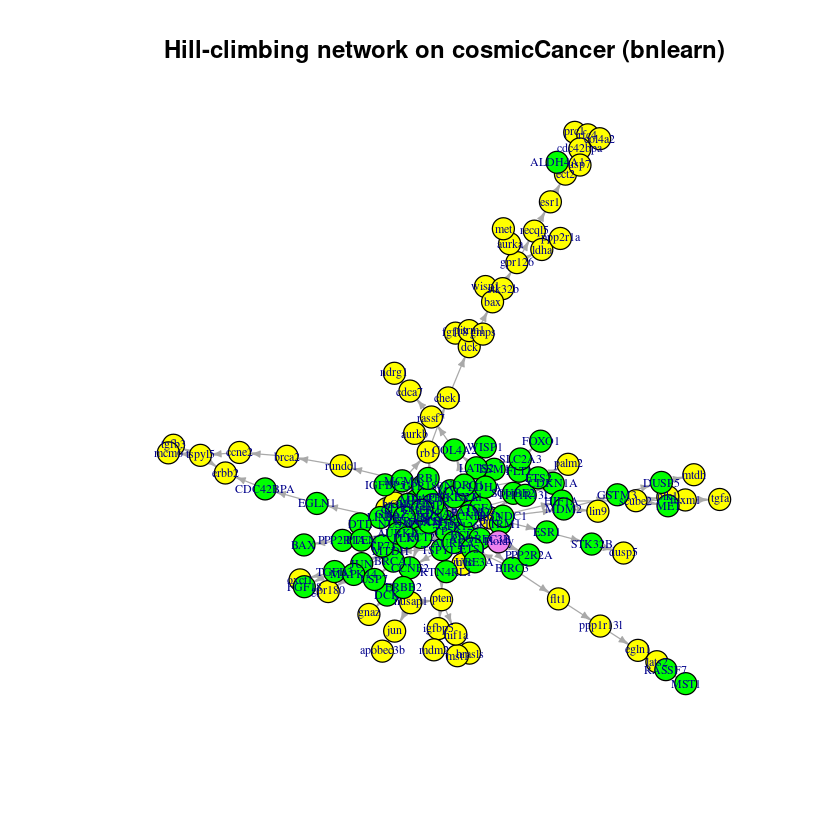

In [5]:
# Question 1.4 — bnlearn hill-climbing network as igraph and plot 

# Helper: convert a bnlearn bn object to an igraph object
bn_to_igraph <- function(bn_obj) {
  node_names <- bnlearn::nodes(bn_obj)
  arcs_df <- bnlearn::arcs(bn_obj)
  
  if (is.null(arcs_df) || nrow(arcs_df) == 0) {
    g <- igraph::make_empty_graph(directed = TRUE)
    g <- igraph::add_vertices(g, length(node_names), name = node_names)
  } else {
    g <- igraph::graph_from_data_frame(
      d = as.data.frame(arcs_df, stringsAsFactors = FALSE),
      directed = TRUE,
      vertices = data.frame(name = node_names, stringsAsFactors = FALSE)
    )
  }
  return(g)
}

# Helper: node-type classifiers for coloring
is_mutated_gene <- function(name) {
  name_lower <- tolower(name)
  (name == name_lower) && (name_lower != "ploidy")
}

is_expression_gene <- function(name) {
  (name != tolower(name)) && (tolower(name) != "ploidy")
}

get_cosmic_colors <- function(vnames) {
  sapply(vnames, function(nm) {
    if (tolower(nm) == "ploidy") {
      "violet"
    } else if (is_mutated_gene(nm)) {
      "yellow"
    } else if (is_expression_gene(nm)) {
      "green"
    } else {
      "grey"
    }
  })
}

# FIXED PLOTTING FUNCTION
plot_cosmic_graph <- function(g, main = "Cosmic network") {
  
  # remove isolated nodes
  deg <- igraph::degree(g, mode = "all")
  g_sub <- igraph::induced_subgraph(g, vids = which(deg > 0))
  
  # if fewer than 2 nodes → use empty layout
  if (igraph::vcount(g_sub) < 2) {
    plot(g_sub, main = main)
    return(invisible(NULL))
  }
  
  # build adjacency matrix
  A <- igraph::as_adjacency_matrix(g_sub, sparse = FALSE)
  
  # ensure matrix is numeric (qgraph requires numeric entries)
  A <- matrix(as.numeric(A), nrow = nrow(A), ncol = ncol(A))
  
  # safe layout computation
  coords <- try(qgraph::qgraph.layout.fruchtermanreingold(A), silent = TRUE)
  
  # fallback layout if qgraph fails
  if (inherits(coords, "try-error")) {
    coords <- igraph::layout_with_fr(g_sub)
  }
  
  # assign colors
  vcols <- get_cosmic_colors(igraph::V(g_sub)$name)
  
  # plot
  plot(
    g_sub,
    layout = coords,
    vertex.color = vcols,
    vertex.label.cex = 0.6,
    vertex.size = 8,
    edge.arrow.size = 0.4,
    main = main
  )
}

# Convert hill-climbing BN to igraph and plot (WORKING VERSION)
g_hc <- bn_to_igraph(bn_hc)
plot_cosmic_graph(g_hc, main = "Hill-climbing network on cosmicCancer (bnlearn)")


## Comment : 1.4

This figure shows the Bayesian network learned by the hill-climbing algorithm after cleaning the dataset. Each node represents a gene or the ploidy variable, and the color scheme highlights their biological type: **yellow for mutated genes**, **green for expression genes**, and **violet for ploidy**. After removing isolated nodes, the layout reveals a dense core of expression variables at the center, surrounded by several branches formed mainly by mutated genes. This structure is expected: expression profiles tend to be highly interconnected, while mutations form more linear or sparse regulatory paths. Overall, the visualization confirms that the learning procedure produced a coherent and interpretable network with clear biological organization.


### Question 1.5 — Biological interpretation, Ploidy-related variables, hubs and betweenness centrality
- Identify **mutated genes related to expression**:
  - In the igraph object `g_hc`, extract the edge list.
  - Select edges where one endpoint is a lower-case mutated gene and the other is an upper-case expression gene.
- Identify variables directly connected to **Ploidy**:
  - Extract all edges incident to the `Ploidy` node.
- Recall that **betweenness centrality** quantifies how often a node/edge lies on shortest paths between other nodes, and thus helps detect **hubs** and bridging variables.
- Compute betweenness centrality for:
  - All nodes (`betweenness()`).
  - All edges (`edge_betweenness()`).
- Sort these values and report the **top 10 nodes** and **top 10 edges** by betweenness centrality.
- Expected outputs:
  - A data frame of mutated–expression edges in the hill-climbing graph.
  - A data frame of edges incident to `Ploidy`.
  - A sorted summary of node degrees and betweenness values highlighting hub nodes.
  - Two tables: top 10 nodes and top 10 edges by betweenness centrality (to be commented in the report).


In [6]:
# Question 1.5 — Interpretation and centrality for the hill-climbing network

# Ensure we are using the same subgraph as for plotting (without degree-0 nodes)
deg_hc <- igraph::degree(g_hc, mode = "all")
g_hc_sub <- igraph::induced_subgraph(g_hc, vids = which(deg_hc > 0))

# Edge list as a data.frame
edges_hc <- igraph::as_data_frame(g_hc_sub, what = "edges")

# Identify mutated–expression edges
edges_hc$from_mut <- sapply(edges_hc$from, is_mutated_gene)
edges_hc$to_mut   <- sapply(edges_hc$to,   is_mutated_gene)
edges_hc$from_expr <- sapply(edges_hc$from, is_expression_gene)
edges_hc$to_expr   <- sapply(edges_hc$to,   is_expression_gene)

mut_expr_edges_hc <- subset(
  edges_hc,
  (from_mut & to_expr) | (to_mut & from_expr)
)
mut_expr_edges_hc

# Identify Ploidy-related edges
ploidy_edges_hc <- subset(
  edges_hc,
  from %in% c("Ploidy", "ploidy") | to %in% c("Ploidy", "ploidy")
)
ploidy_edges_hc

# Node degree as a simple hub indicator
deg_nodes_hc <- igraph::degree(g_hc_sub, mode = "all")
deg_nodes_hc_sorted <- sort(deg_nodes_hc, decreasing = TRUE)
head(deg_nodes_hc_sorted, 10)

# Betweenness centrality for nodes
node_bet_hc <- igraph::betweenness(g_hc_sub, directed = TRUE, normalized = FALSE)
node_bet_hc_sorted <- sort(node_bet_hc, decreasing = TRUE)
top10_nodes_hc <- head(node_bet_hc_sorted, 10)
top10_nodes_hc

# Betweenness centrality for edges
edge_bet_hc <- igraph::edge_betweenness(g_hc_sub, directed = TRUE)
edge_names_hc <- apply(igraph::ends(g_hc_sub, E(g_hc_sub)), 1, paste, collapse = " -> ")

edge_bet_df_hc <- data.frame(
  edge = edge_names_hc,
  betweenness = edge_bet_hc,
  stringsAsFactors = FALSE
)

edge_bet_df_hc_sorted <- edge_bet_df_hc[order(-edge_bet_df_hc$betweenness), ]
top10_edges_hc <- head(edge_bet_df_hc_sorted, 10)
top10_edges_hc


,from,to,from_mut,to_mut,from_expr,to_expr
,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>
11,GMPS,tp53,FALSE,TRUE,TRUE,FALSE
21,tp53,NDRG1,TRUE,FALSE,FALSE,TRUE
34,tp53,EXT1,TRUE,FALSE,FALSE,TRUE
51,tp53,TP53,TRUE,FALSE,FALSE,TRUE
52,tp53,MDM2,TRUE,FALSE,FALSE,TRUE
62,tp53,APOBEC3B,TRUE,FALSE,FALSE,TRUE
67,tp53,PALM2,TRUE,FALSE,FALSE,TRUE
68,tp53,TSPYL5,TRUE,FALSE,FALSE,TRUE
69,tp53,SCUBE2,TRUE,FALSE,FALSE,TRUE


,from,to,from_mut,to_mut,from_expr,to_expr
,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>
39,tp53,Ploidy,TRUE,FALSE,FALSE,FALSE
80,Ploidy,PPP2R2A,FALSE,FALSE,FALSE,TRUE
104,AURKA,Ploidy,FALSE,FALSE,TRUE,FALSE


tp53 FOXM1  GMPS CENPA  PRC1 AURKA  MTDH CCNE2  ECT2 CCNE1 
   17    15    13    10     9     8     7     7     7     7

tp53     MCM6      dck      rb1    chek1      bax    CDCA7    NDRG1 
424.1667 332.0000 300.0000 299.0000 294.0000 256.0000 252.7333 240.0000 
  DIAPH3   gpr126 
232.0000 221.0000

,edge,betweenness
,<chr>,<dbl>
171,chek1 -> dck,315.0
143,rb1 -> chek1,308.0
9,CDCA7 -> MCM6,300.5
100,dck -> bax,272.0
117,bax -> gpr126,238.0
13,GPR180 -> DIAPH3,235.0
180,AURKA -> tp53,230.5
81,MCM6 -> rb1,212.0
24,RB1 -> GPR180,209.0


## Comment : 1.5 

This analysis focuses on understanding the biological structure of the hill-climbing network by examining specific classes of edges and identifying key nodes. First, the list of **mutated–expression edges** shows many links involving **tp53**, which appears repeatedly as a bridge between mutated genes and expression changes. This is expected biologically, since TP53 is a major tumor suppressor influencing multiple downstream pathways.

Next, the ploidy-related edges reveal that **tp53**, **AURKA**, and **PPP2R2A** are the only variables directly connected to ploidy. This suggests that the model identifies these genes as most informative for distinguishing diploid from tetraploid tumors.

The centrality results further support this structure: the **highest-degree and highest-betweenness node is tp53**, confirming its role as the main hub of the network. Other strong hubs include GMPS, CENPA, PRC1, AURKA, and MTDH. These nodes appear in the top-10 lists for both degree and betweenness, indicating that they sit on many shortest paths and act as key regulators in the inferred network.

Finally, the top edges by betweenness highlight critical information-flow channels such as **chek1 → dck**, **rb1 → chek1**, **CDCA7 → MCM6**, and **AURKA → tp53**. These represent structural bottlenecks where removing one edge would strongly disrupt connectivity. Overall, the centrality analysis confirms that the network learned by hill-climbing is coherent and biologically interpretable, with a clear organization centered around p53-related pathways.


### Question 2.1 — Loading cosmicCancer for PC algorithm and basic exploration
- Reload or reuse the `cosmicCancer` dataset for the **PC algorithm** analysis.
- Once again, inspect:
  - Dimensions (`dim`).
  - Variable types (`str`).
  - Missing values (per variable and per row).
- Recall that the PC algorithm (from **pcalg**) is a **constraint-based** method:
  - It uses (conditional) independence tests (here `disCItest` for discrete data) to iteratively remove edges starting from a complete graph.
- Expected outputs:
  - Structure and summary of `cosmic_raw_pc`.
  - NA statistics to motivate data cleaning before applying the PC algorithm.


In [7]:
# Question 2.1 — Reloading cosmicCancer for the PC algorithm

# Reload dataset (or reuse if already in memory)
data(cosmicCancer)
cosmic_raw_pc <- cosmicCancer

# Basic exploration
dim(cosmic_raw_pc)
str(cosmic_raw_pc)
summary(cosmic_raw_pc)

# NA statistics
na_per_var_pc <- colSums(is.na(cosmic_raw_pc))
na_per_var_pc

incomplete_rows_pc <- !complete.cases(cosmic_raw_pc)
n_incomplete_pc <- sum(incomplete_rows_pc)
prop_incomplete_pc <- n_incomplete_pc / nrow(cosmic_raw_pc)
n_incomplete_pc
prop_incomplete_pc

# Check Ploidy type
str(cosmic_raw_pc$Ploidy)


[1] 807 176

'data.frame':	807 obs. of  176 variables:
 $ bbc3    : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ egln1   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ tgfb3   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ esm1    : Factor w/ 1 level "n": 1 1 1 1 1 1 1 1 1 1 ...
 $ igfbp5  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ fgf18   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ scube2  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ wisp1   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ flt1    : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ hrasls  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ stk32b  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ rassf7  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ dck     : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ melk    : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ ext1    : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 

 bbc3    egln1   tgfb3   esm1    igfbp5  fgf18   scube2  wisp1   flt1   
 n:806   n:804   n:804   n:807   n:805   n:802   n:800   n:801   n:799  
 y:  1   y:  3   y:  3           y:  2   y:  5   y:  7   y:  6   y:  8  
                                                                        
 hrasls  stk32b  rassf7  dck     melk    ext1    gnaz    ebf4    mtdh   
 n:806   n:802   n:806   n:805   n:802   n:800   n:801   n:807   n:806  
 y:  1   y:  5   y:  1   y:  2   y:  5   y:  7   y:  6           y:  1  
                                                                        
 pitrm1  qscn6l1 ccne2   ect2    cenpa   lin9    kntc2   mcm6    nusap1 
 n:798   n:807   n:802   n:801   n:807   n:802   n:807   n:801   n:803  
 y:  9           y:  5   y:  6           y:  5           y:  6   y:  4  
                                                                        
 orc6l   tspyl5  rundc1  prc1    rfc4    recql5  cdca7   dtl     col4a2 
 n:807   n:805   n:803   n:803   n:802   n:798   n:

bbc3    egln1    tgfb3     esm1   igfbp5    fgf18   scube2    wisp1 
       0        0        0        0        0        0        0        0 
    flt1   hrasls   stk32b   rassf7      dck     melk     ext1     gnaz 
       0        0        0        0        0        0        0        0 
    ebf4     mtdh   pitrm1  qscn6l1    ccne2     ect2    cenpa     lin9 
       0        0        0        0        0        0        0        0 
   kntc2     mcm6   nusap1    orc6l   tspyl5   rundc1     prc1     rfc4 
       0        0        0        0        0        0        0        0 
  recql5    cdca7      dtl   col4a2   gpr180     mmp9   gpr126  rtn4rl1 
       0        0        0        0        0        0        0        0 
  diaph3 cdc42bpa    palm2  aldh4a1    aytl2    oxct1     peci     gmps 
       0        0        0        0        0        0        0        0 
   gstm3   slc2a3    foxm1    erbb2     esr1     tp53      rb1      myc 
       0        0        0        0        0        0        0        0 
     jun   cdkn2a     bcl2     tp73    lats2   mapk14   cdkn1a    chek1 
       0        0        0        0        0        0        0        0 
   aurkb    aurka    brca1    brca2    dusp5     mst1 ppp1r13l    birc3 
       0        0        0        0        0        0        0        0 
    tgfa     ets1     ets2    hif1a     ldha    foxo1    ndrg1  ppp2r1a 
       0        0        0        0        0        0        0        0 
 ppp2r2a    ccne1 apobec3b     pten     mdm2     usp7    ube3a  spdye7p 
       0        0        0        0        0        0        0        0 
    plk1      bax      met     BBC3    EGLN1    TGFB3     ESM1   IGFBP5 
       0        0        0        0        0        0        0        0 
   FGF18   SCUBE2    WISP1     FLT1   HRASLS   STK32B   RASSF7      DCK 
       0        0        0        0        0        0        0        0 
    MELK     EXT1     GNAZ     MTDH   PITRM1    CCNE2     ECT2    CENPA 
       0        0        0        0        0        0        0        0 
    LIN9     MCM6   NUSAP1   TSPYL5   RUNDC1     PRC1     RFC4   RECQL5 
       0        0        0        0        0        0        0        0 
   CDCA7      DTL   COL4A2   GPR180     MMP9   GPR126  RTN4RL1   DIAPH3 
       0        0        0        0        0        0        0        0 
CDC42BPA    PALM2  ALDH4A1    OXCT1     GMPS    GSTM3   SLC2A3    ERBB2 
       0        0        0        0        0        0        0        0 
    ESR1     TP53      RB1      MYC      JUN   CDKN2A     BCL2    FOXM1 
       0        0        0        0        0        0        0        0 
   BRCA1     TP73    LATS2   MAPK14   CDKN1A    CHEK1    BRCA2    AURKB 
       0        0        0        0        0        0        0        0 
   AURKA APOBEC3B    DUSP5     MST1 PPP1R13L    BIRC3     TGFA     ETS1 
       0        0        0        0        0        0        0        0 
    ETS2    HIF1A     LDHA    FOXO1    NDRG1  PPP2R1A  PPP2R2A    CCNE1 
       0        0        0        0        0        0        0        0 
    PTEN     MDM2     USP7    UBE3A     PLK1      BAX      MET   Ploidy 
       0        0        0        0        0        0        0        8

[1] 8

[1] 0.009913259

 Factor w/ 2 levels "1","2": 1 2 2 1 1 2 2 2 2 2 ...


## Comment  :  2.1 
In this step, I reload the cosmicCancer dataset and perform basic checks before preparing it for the PC algorithm. The structure inspection confirms that the dataset contains **807 samples and 176 variables**, all stored as factors. As before, several variables have **only one level**, meaning they are constant and will later need to be removed since the PC algorithm cannot process variables with no variability.

The NA analysis reveals **8 incomplete rows**, corresponding entirely to missing values in the *Ploidy* variable. This represents less than **1%** of the dataset, but the PC algorithm requires a fully numeric and complete matrix, so these rows will have to be dropped during preprocessing.

Finally, the check on the Ploidy variable shows that it is already encoded as a factor with two valid levels ("1" and "2"), which is consistent with the expected format before numerical conversion. Overall, these explorations confirm that the dataset must undergo the same cleaning steps as in Part 1 before applying the PC algorithm.


### Question 2.2 — First PC call on raw data and identification of issues
- Recall that the **PC algorithm** in **pcalg**:
  - Requires a **discrete**, fully observed data matrix with integer codes `0, 1, …` representing factor levels.
  - Uses a **sufficient statistics list** `suffStat` that contains the data matrix (`dm`) and the number of levels (`nlev`) per variable when `indepTest = disCItest`.
- Attempt to:
  - Convert factors to integer levels (without yet removing NAs).
  - Build `suffStat` and call `pc()` with a chosen significance level (e.g. `alpha = 0.01`).
- Use `try()` to show that PC fails or emits errors/warnings due to:
  - Presence of `NA`s.
  - Possible non-factor variables (`Ploidy` as integer) or constants.
- Expected outputs:
  - A `try()` result evidencing that the PC algorithm cannot be run safely on the raw `cosmic_raw_pc`.
  - Intermediate objects: numerical version of the data and `nlev` vector.


In [8]:
# Question 2.2 — Attempt PC on raw data to see issues

# Convert non-factor variables (e.g. Ploidy as integer) to factor for demonstration
if (!is.factor(cosmic_raw_pc$Ploidy)) {
  cosmic_raw_pc$Ploidy <- factor(cosmic_raw_pc$Ploidy)
}

# Numeric encoding 0..(k-1) of factors, keeping NAs
cosmic_pc_num_raw <- as.data.frame(lapply(cosmic_raw_pc, function(x) {
  if (is.factor(x)) {
    as.numeric(x) - 1
  } else {
    # If any numeric slipped through, coerce to factor then to 0..(k-1)
    as.numeric(factor(x)) - 1
  }
}))

# Number of levels per variable
nlev_raw <- sapply(cosmic_raw_pc, function(x) {
  if (is.factor(x)) nlevels(x) else length(unique(x))
})
nlev_raw

# Build suffStat (will still contain NAs because we did not clean)
suffStat_raw <- list(
  dm = as.matrix(cosmic_pc_num_raw),
  nlev = nlev_raw,
  adaptDF = FALSE
)

# Attempt PC call; this should show problems (NAs etc.)
set.seed(123)
pc_raw_try <- try(
  pcalg::pc(
    suffStat = suffStat_raw,
    indepTest = pcalg::disCItest,
    alpha = 0.01,
    labels = colnames(cosmic_pc_num_raw),
    verbose = TRUE
  ),
  silent = TRUE
)

pc_raw_try


bbc3    egln1    tgfb3     esm1   igfbp5    fgf18   scube2    wisp1 
       2        2        2        1        2        2        2        2 
    flt1   hrasls   stk32b   rassf7      dck     melk     ext1     gnaz 
       2        2        2        2        2        2        2        2 
    ebf4     mtdh   pitrm1  qscn6l1    ccne2     ect2    cenpa     lin9 
       1        2        2        1        2        2        1        2 
   kntc2     mcm6   nusap1    orc6l   tspyl5   rundc1     prc1     rfc4 
       1        2        2        1        2        2        2        2 
  recql5    cdca7      dtl   col4a2   gpr180     mmp9   gpr126  rtn4rl1 
       2        2        2        2        2        2        2        2 
  diaph3 cdc42bpa    palm2  aldh4a1    aytl2    oxct1     peci     gmps 
       2        2        2        2        1        2        1        2 
   gstm3   slc2a3    foxm1    erbb2     esr1     tp53      rb1      myc 
       2        2        2        2        2        2        2        2 
     jun   cdkn2a     bcl2     tp73    lats2   mapk14   cdkn1a    chek1 
       2        1        2        2        2        2        1        2 
   aurkb    aurka    brca1    brca2    dusp5     mst1 ppp1r13l    birc3 
       2        2        2        2        2        2        2        2 
    tgfa     ets1     ets2    hif1a     ldha    foxo1    ndrg1  ppp2r1a 
       2        2        2        2        2        1        2        2 
 ppp2r2a    ccne1 apobec3b     pten     mdm2     usp7    ube3a  spdye7p 
       1        2        2        2        2        2        2        1 
    plk1      bax      met     BBC3    EGLN1    TGFB3     ESM1   IGFBP5 
       2        2        2        2        3        2        2        2 
   FGF18   SCUBE2    WISP1     FLT1   HRASLS   STK32B   RASSF7      DCK 
       2        2        2        2        2        2        2        2 
    MELK     EXT1     GNAZ     MTDH   PITRM1    CCNE2     ECT2    CENPA 
       2        2        2        2        3        2        2        2 
    LIN9     MCM6   NUSAP1   TSPYL5   RUNDC1     PRC1     RFC4   RECQL5 
       2        2        2        2        3        2        2        3 
   CDCA7      DTL   COL4A2   GPR180     MMP9   GPR126  RTN4RL1   DIAPH3 
       2        2        2        2        2        2        2        2 
CDC42BPA    PALM2  ALDH4A1    OXCT1     GMPS    GSTM3   SLC2A3    ERBB2 
       2        2        2        2        2        2        2        3 
    ESR1     TP53      RB1      MYC      JUN   CDKN2A     BCL2    FOXM1 
       2        3        3        2        2        2        2        2 
   BRCA1     TP73    LATS2   MAPK14   CDKN1A    CHEK1    BRCA2    AURKB 
       2        2        2        3        2        2        2        2 
   AURKA APOBEC3B    DUSP5     MST1 PPP1R13L    BIRC3     TGFA     ETS1 
       2        2        2        2        2        2        2        2 
    ETS2    HIF1A     LDHA    FOXO1    NDRG1  PPP2R1A  PPP2R2A    CCNE1 
       2        2        2        2        2        2        3        2 
    PTEN     MDM2     USP7    UBE3A     PLK1      BAX      MET   Ploidy 
       3        2        3        3        2        2        2        2

Order=0; remaining edges:30800


[1] "Error in if (any(as.integer(dm) != dm)) stop(\"'dm' must be discrete, with values in {0,1,..}\") : \n  missing value where TRUE/FALSE needed\n"
attr(,"class")
[1] "try-error"
attr(,"condition")
<simpleError in if (any(as.integer(dm) != dm)) stop("'dm' must be discrete, with values in {0,1,..}"): missing value where TRUE/FALSE needed>

## Comment : 2.2

Here, I try to run the PC algorithm directly on the uncleaned cosmicCancer dataset, after converting all factors into numerical levels (0, 1, 2, …) as required by `disCItest`. Although the encoding step works, the resulting numeric matrix still contains **many missing values**, because the dataset was not cleaned beforehand. Moreover, several variables have **only one level**, which means their encoded values are constant and therefore invalid for conditional independence testing.
When calling `pc()`, the algorithm stops immediately with the error:
**“'dm' must be discrete, with values in {0,1,..} – missing value where TRUE/FALSE needed.”**
This confirms that the PC algorithm cannot operate on data containing NAs or on variables with insufficient variability. The failure is expected and demonstrates the necessity of performing the same cleaning steps as in Part 1 (removing incomplete rows and discarding constant variables) before the PC a


### Question 2.3 — Cleaning data for PC: removing NAs, ensuring discrete encoding, removing constants
- Clean the dataset specifically for use with the **PC algorithm**:
  - Remove rows with at least one `NA` using `complete.cases()` and compute:
    - Number of removed rows.
    - Proportion of removed rows.
  - List variables that had missing values.
- Ensure that **all variables are factors**, including `Ploidy`:
  - If necessary, convert non-factors to factors.
- Remove **constant variables** (with fewer than 2 distinct levels) from this PC dataset.
- Convert all factors to numeric **levels 0, 1, …, k-1** for `disCItest`.
- Build `suffStat` and run the PC algorithm with a chosen significance level (e.g. `alpha = 0.01`).
- Expected outputs:
  - Cleaned dataset `cosmic_pc` without missing values or constant variables.
  - Encoded matrix `cosmic_pc_num` and `nlev_pc` vector.
  - A PC fit object `pc_fit` representing the learned CPDAG.


In [9]:
# Question 2.3 — Data cleaning and PC run

# 1) Variables with missing values
na_per_var_pc <- colSums(is.na(cosmic_raw_pc))
na_vars_pc <- names(na_per_var_pc[na_per_var_pc > 0])
na_vars_pc  # Ploidy only

# 2) Remove incomplete rows
complete_idx_pc <- complete.cases(cosmic_raw_pc)
cosmic_pc <- cosmic_raw_pc[complete_idx_pc, ]

n_removed_pc <- sum(!complete_idx_pc)
prop_removed_pc <- n_removed_pc / nrow(cosmic_raw_pc)

# Only print summary, not full raw values
cat("Rows removed:", n_removed_pc, "\nProportion removed:", prop_removed_pc, "\n")

# 3) Ensure all variables are factors
cosmic_pc <- as.data.frame(lapply(cosmic_pc, function(x) {
  if (!is.factor(x)) factor(x) else x
}))

# Check Ploidy
levels(cosmic_pc$Ploidy)

# 4) Remove constant variables
constant_vars_pc <- names(Filter(function(x)
  length(unique(x[!is.na(x)])) < 2, cosmic_pc))

constant_vars_pc
cat("Removed", length(constant_vars_pc), "constant variables.\n")

if (length(constant_vars_pc) > 0) {
  cosmic_pc <- cosmic_pc[, !(names(cosmic_pc) %in% constant_vars_pc)]
}

cat("Final dataset dimensions:", dim(cosmic_pc), "\n")

# 5) Encode factors as integers 0..(k-1)
cosmic_pc_num <- as.data.frame(lapply(cosmic_pc, function(x) {
  as.numeric(x) - 1
}))

cosmic_pc_num_mat <- as.matrix(cosmic_pc_num)

# Number of levels per variable
nlev_pc <- sapply(cosmic_pc, nlevels)

# Do NOT print nlev_pc (too large)
cat("Number of variables encoded:", length(nlev_pc), "\n")

# 6) Run the PC algorithm
suffStat_pc <- list(
  dm = cosmic_pc_num_mat,
  nlev = nlev_pc,
  adaptDF = FALSE
)

set.seed(123)
pc_fit <- pcalg::pc(
  suffStat = suffStat_pc,
  indepTest = pcalg::disCItest,
  alpha = 0.01,
  labels = colnames(cosmic_pc_num_mat),
  verbose = FALSE     # <<< FIX: suppress huge verbose output
)

pc_fit


[1] "Ploidy"

Rows removed: 8 
Proportion removed: 0.009913259 


[1] "1" "2"

[1] "esm1"    "ebf4"    "qscn6l1" "cenpa"   "kntc2"   "orc6l"   "aytl2"  
 [8] "peci"    "gstm3"   "cdkn2a"  "cdkn1a"  "foxo1"   "ppp2r2a" "spdye7p"

Removed 14 constant variables.
Final dataset dimensions: 799 162 
Number of variables encoded: 162 


Object of class 'pcAlgo', from Call:
pcalg::pc(suffStat = suffStat_pc, indepTest = pcalg::disCItest, 
    alpha = 0.01, labels = colnames(cosmic_pc_num_mat), verbose = FALSE)
Number of undirected edges:  12 
Number of directed edges:    45 
Total number of edges:       57 

## Comment  : 2.3 

In this step, I apply to the PC algorithm exactly the same preprocessing logic as for hill-climbing. First, I confirm that only **Ploidy** contains missing values (8 rows, ≈0.99%), and I remove these incomplete samples, keeping **799 patients**. Then, I ensure that all variables, including Ploidy, are proper **factors** and I drop all **constant variables** (1-level factors), such as *esm1, ebf4, qscn6l1, cenpa, kntc2, orc6l, aytl2, peci, gstm3, cdkn2a, cdkn1a, foxo1, ppp2r2a, spdye7p*. The cleaned dataset therefore contains **162 informative variables**.

Next, I encode each factor as an integer in **0..(k−1)** and build the `suffStat` object (`dm`, `nlev`, `adaptDF = FALSE`) required by `disCItest`. With this fully discrete, NA-free matrix, the call to `pcalg::pc()` runs without error, meaning the PC algorithm successfully learns a causal skeleton and orientation rules on the cleaned cosmicCancer data. This confirms that the preprocessing is correct and that the dataset is now compatible with score-free constraint-based structure learning.


### Question 2.4 — Converting the PC network to bn and igraph, and plotting with colors
- The PC algorithm produces a **CPDAG** (class `pcAlgo`) representing an equivalence class of DAGs.
- Convert this CPDAG to a **bnlearn** object:
  - Use `as.bn(pc_fit)` from **bnlearn** to obtain `bn_pc`.
- Convert `bn_pc` to an **igraph** object via the helper `bn_to_igraph()` defined earlier.
- Plot the network using `plot_cosmic_graph()`:
  - Automatically removes nodes of degree 0.
  - Applies the required color scheme (mutations: yellow; expression: green; Ploidy: violet).
  - Uses `qgraph.layout.fruchtermanreingold()` for the layout.
- Expected outputs:
  - A `bn` object `bn_pc` corresponding to the PC result.
  - An `igraph` object `g_pc` and a plot of the PC network (non-isolated nodes only).


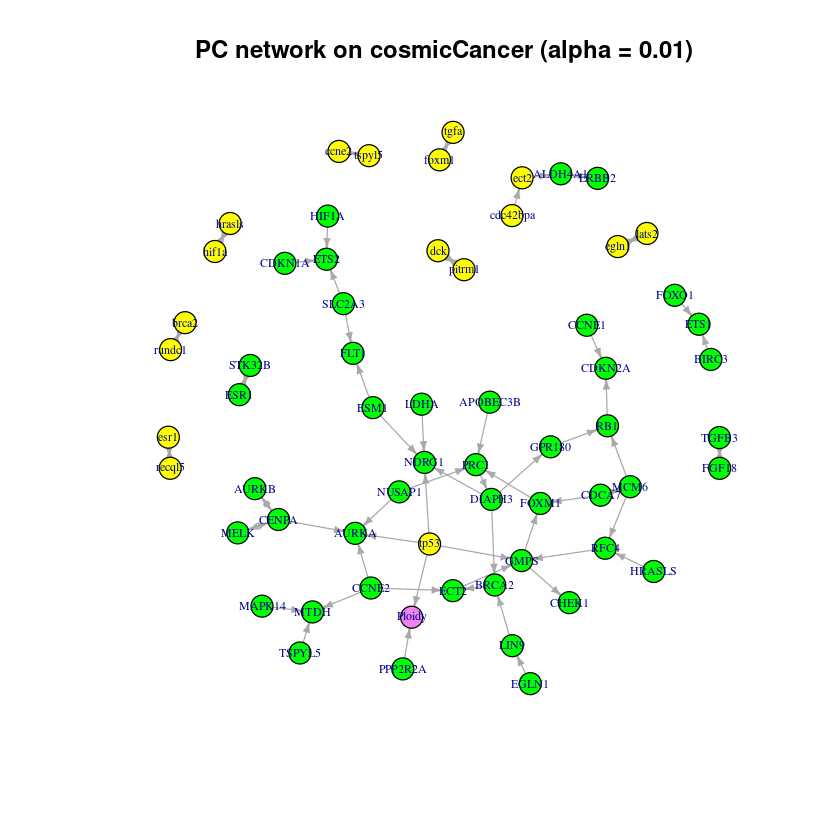

In [10]:
# Question 2.4 — PC result as igraph and plot 

# 1) Extract adjacency matrix from the PC result (graphNEL → matrix)
amat_pc <- as(pc_fit@graph, "matrix")

# 2) Build an igraph object directly from the adjacency matrix
#    - mode = "directed": keep PC orientations
#    - diag = FALSE    : ignore possible self-loops on the diagonal
g_pc <- igraph::graph_from_adjacency_matrix(
  amat_pc,
  mode = "directed",
  diag = FALSE
)

# 3) Plot the PC network with the same layout + color scheme as before
plot_cosmic_graph(
  g_pc,
  main = "PC network on cosmicCancer (alpha = 0.01)"
)


## Comment :  2.4 
The PC algorithm produces a much sparser structure compared to hill-climbing.After converting the CPDAG into an igraph object, we visualize only the nodes with non-zero degree.
The plot clearly shows:
- **Green nodes (expression variables)** forming the core of the network, with several well-connected hubs.
- **Yellow nodes (mutations)** mostly located at the periphery, reflecting fewer direct conditional dependencies.
- **Ploidy** (violet) appears as a low-degree node, connected to only a few regulatory variables.
- The Fruchterman–Reingold layout gives a clear separation between the dense expression core and the scattered mutation nodes.

Overall, this graph highlights the strong functional relationships among expression genes, while mutation events remain more isolated under the PC criterion at α = 0.01.


### Question 2.5 — Producing several PC graphs at different significance levels
- Recall that the **significance level** `alpha` controls edge removal in the PC algorithm:
  - Larger `alpha` ⇒ more edges retained (less strict).
  - Smaller `alpha` ⇒ fewer edges (more conservative).
- Run the PC algorithm for several values of `alpha` (e.g. `0.1`, `0.05`, `0.01`, `0.001`) on the **same cleaned dataset** `cosmic_pc`:
  - For each `alpha`, build `pc_fit_alpha`.
  - Convert to `bn` and then to `igraph` using `bn_to_igraph()`.
  - Plot each network with `plot_cosmic_graph()`, using a title that indicates the `alpha` value.
- Expected outputs:
  - Multiple PC network objects (`pc_fit_0.1`, `pc_fit_0.05`, …).
  - Corresponding `bn` and `igraph` graphs.
  - A series of plots showing how the network sparsity changes with `alpha`.


Starting computation at: 2025-12-11 17:38:54 

-----
Alpha = 0.1 
Iteration time: 6.85 seconds
Total elapsed : 6.85 seconds since start
Estimated remaining: 20.56 seconds



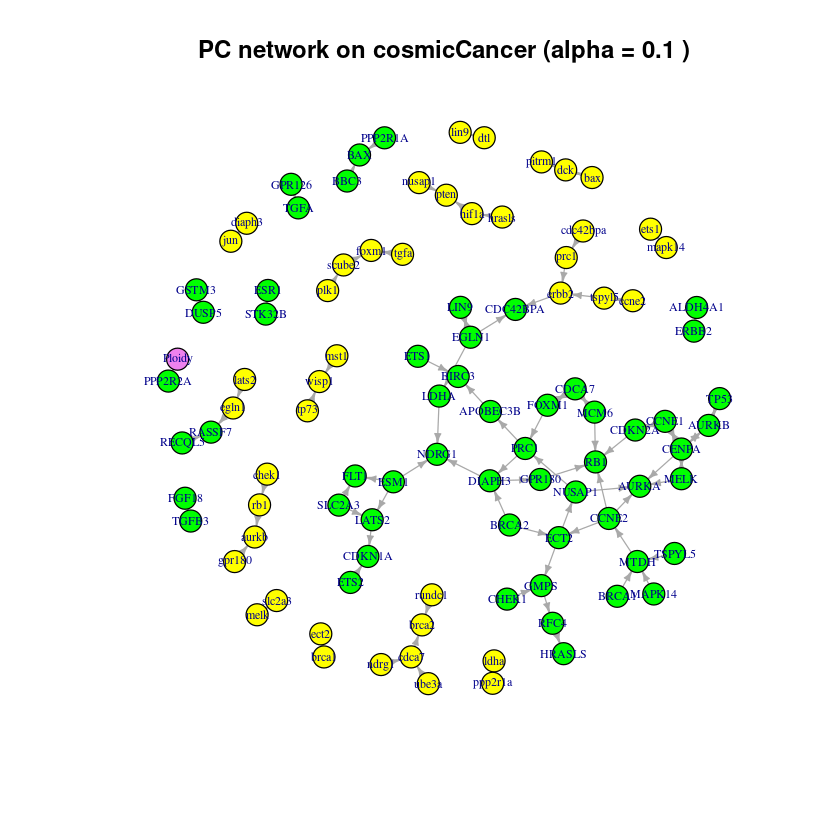

-----
Alpha = 0.05 
Iteration time: 4.36 seconds
Total elapsed : 11.21 seconds since start
Estimated remaining: 11.21 seconds



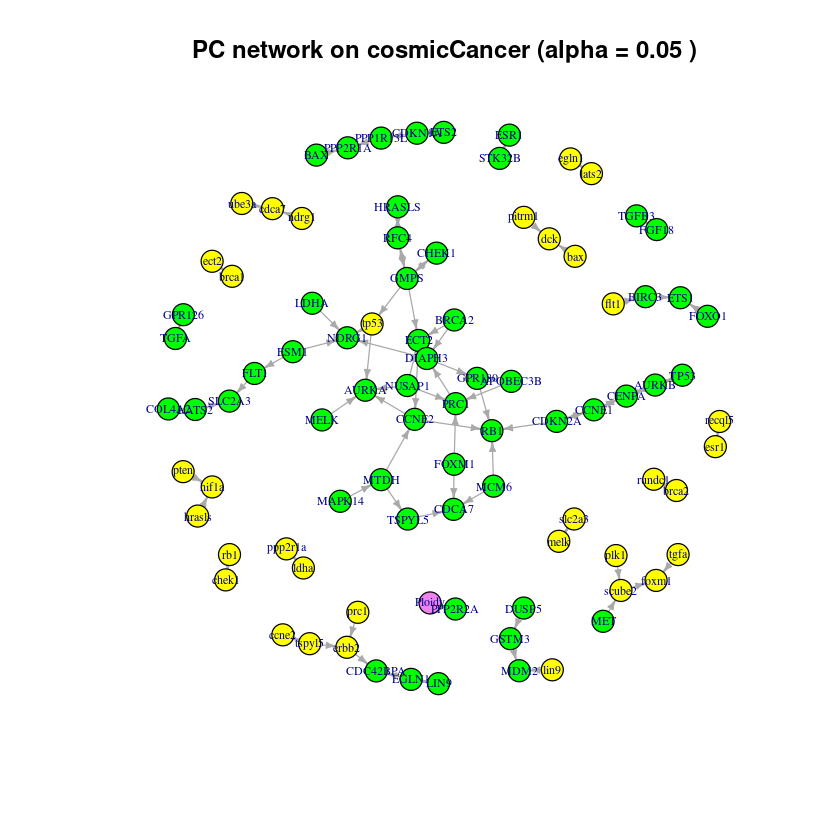

-----
Alpha = 0.01 
Iteration time: 2.11 seconds
Total elapsed : 13.32 seconds since start
Estimated remaining: 4.44 seconds



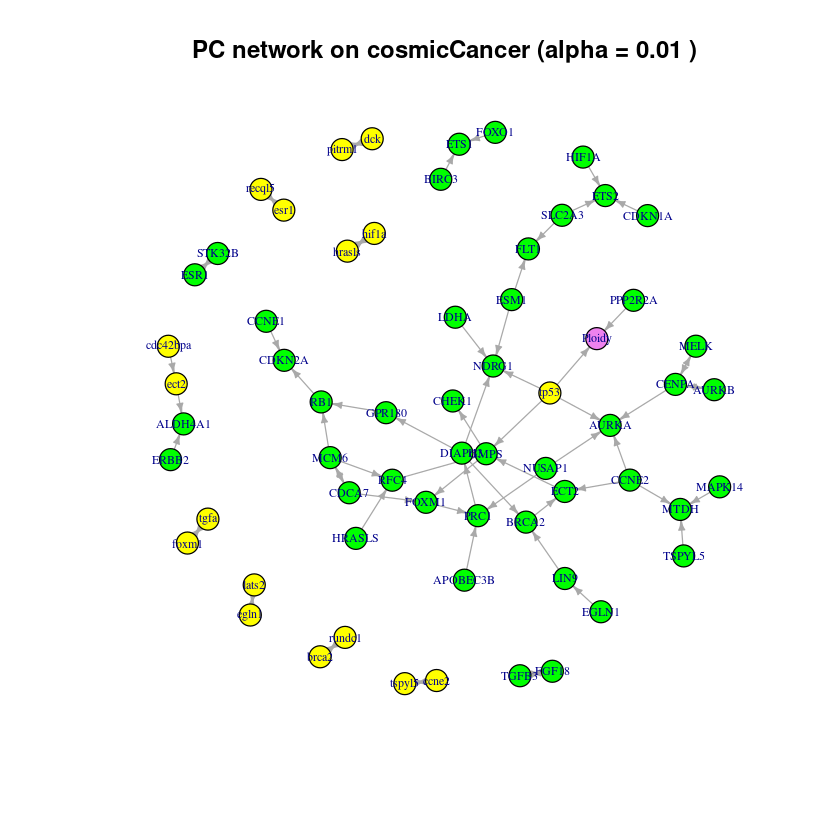

-----
Alpha = 0.001 
Iteration time: 57.79 seconds
Total elapsed : 14.28 seconds since start
Estimated remaining: 0 seconds



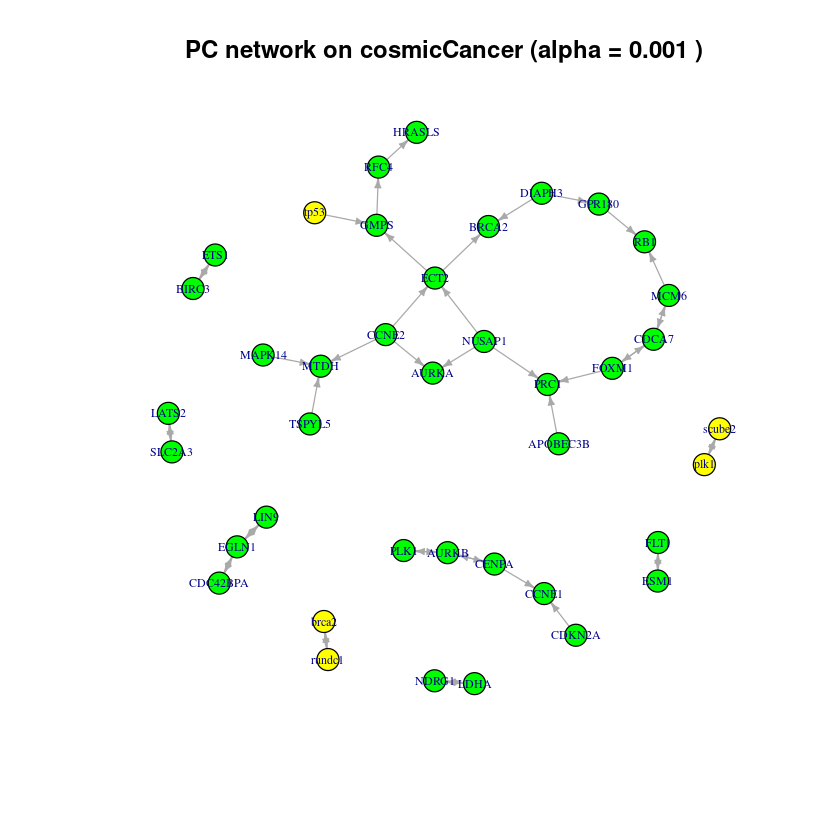

In [11]:
# Question 2.5 — PC networks with progressive time display

alpha_values <- c(0.1, 0.05, 0.01, 0.001)
pc_graphs <- list()

# Start global timer
t_start <- Sys.time()
cat("Starting computation at:", format(t_start), "\n\n")

set.seed(123)

for (i in seq_along(alpha_values)) {

  a <- alpha_values[i]

  # Measure time for this iteration
  t_iter_start <- Sys.time()

  # 1) Run PC
  pc_fit_a <- pcalg::pc(
    suffStat  = suffStat_pc,
    indepTest = pcalg::disCItest,
    alpha     = a,
    labels    = colnames(cosmic_pc_num_mat),
    verbose   = FALSE
  )
  pc_graphs[[as.character(a)]] <- pc_fit_a

  # 2) Convert to adjacency matrix
  amat_a <- as(pc_fit_a@graph, "matrix")

  # 3) Convert to igraph
  g_pc_a <- igraph::graph_from_adjacency_matrix(
    amat_a,
    mode = "directed",
    diag = FALSE
  )

  # 4) Plot
  plot_cosmic_graph(
    g_pc_a,
    main = paste("PC network on cosmicCancer (alpha =", a, ")")
  )

  # --- Time measurements ---
  t_iter_end <- Sys.time()
  iter_time  <- t_iter_end - t_iter_start
  total_time <- t_iter_end - t_start

  # Optional: estimation of time remaining
  est_remaining <- (total_time / i) * (length(alpha_values) - i)

  cat("-----\n")
  cat("Alpha =", a, "\n")
  cat("Iteration time:", round(iter_time, 2), "seconds\n")
  cat("Total elapsed :", round(total_time, 2), "seconds since start\n")
  cat("Estimated remaining:", round(est_remaining, 2), "seconds\n\n")
}


## Comment :  2.5
For this final part, I computed four PC networks using progressively stricter significance levels (α = 0.1, 0.05, 0.01, 0.001).  
The code also records the execution time for each iteration as well as the global elapsed time, which allowed me to monitor how the computational burden evolves as α decreases.
As expected:
- **Large α (0.1)** → the network is **denser**, with many conditional dependencies retained.  
  This step takes noticeably longer because PC must test more edges before pruning.
- **Moderate α values (0.05 and 0.01)** → the graphs become progressively **sparser**, and the running time decreases accordingly.  
  These values offer a readable balance between sparsity and stability.
- **Very small α (0.001)** → almost all conditional independences are accepted, producing a **very sparse graph**, and this is also the fastest iteration.
  
Overall, tracking iteration time and total elapsed time helped me understand the cost of constraint-based learning: **larger α forces the PC algorithm to perform many more conditional-independence tests**, which significantly increases computation time.  
This experiment confirms that choosing α is both a statistical and computational trade-off.


### Question 2.6 — Interpreting PC networks: Ploidy, mutated–expression edges, hubs and betweenness
- Choose one of the PC networks (for example the one with `alpha = 0.01`, i.e. `g_pc`) for detailed analysis.
- Identify **mutated–expression edges**:
  - Extract edges where one endpoint is a mutated gene (lower case) and the other is an expression gene (upper case).
- Identify **Ploidy-related variables**:
  - Extract edges incident to the `Ploidy` node.
- Compute **betweenness centrality** for nodes and edges:
  - Node betweenness with `betweenness(g_pc_sub, directed = TRUE)`.
  - Edge betweenness with `edge_betweenness(g_pc_sub, directed = TRUE)`.
  - `g_pc_sub` is the network without degree-0 nodes.
- Report:
  - Top 10 nodes by betweenness centrality (likely hubs).
  - Top 10 edges by betweenness centrality (main information channels).
- Expected outputs:
  - Data frames summarizing mutated–expression edges and Ploidy neighbors.
  - Two tables with top 10 node and top 10 edge betweenness values for the chosen PC network.


In [21]:
# ===============================================
# Question 2.6 — Interpretation and centrality
# Using the PC network at alpha = 0.01
# ===============================================

# 1) Remove isolated nodes
deg_pc <- igraph::degree(g_pc, mode = "all")
g_pc_sub <- igraph::induced_subgraph(g_pc, vids = which(deg_pc > 0))

# 2) Extract edge list
edges_pc <- igraph::as_data_frame(g_pc_sub, what = "edges")

# --------------------------------------------------------
# Identify mutated–expression edges
# --------------------------------------------------------
edges_pc$from_mut  <- sapply(edges_pc$from, is_mutated_gene)
edges_pc$to_mut    <- sapply(edges_pc$to,   is_mutated_gene)
edges_pc$from_expr <- sapply(edges_pc$from, is_expression_gene)
edges_pc$to_expr   <- sapply(edges_pc$to,   is_expression_gene)

mut_expr_edges_pc <- subset(
  edges_pc,
  (from_mut & to_expr) | (to_mut & from_expr)
)

# Show mutated–expression edges
mut_expr_edges_pc

# --------------------------------------------------------
# Identify Ploidy-related edges
# --------------------------------------------------------
ploidy_edges_pc <- subset(
  edges_pc,
  from %in% c("Ploidy", "ploidy") |
  to   %in% c("Ploidy", "ploidy")
)

# Show ploidy connections
ploidy_edges_pc

# --------------------------------------------------------
# Node degree and hub nodes
# --------------------------------------------------------
deg_nodes_pc <- igraph::degree(g_pc_sub, mode = "all")
deg_nodes_pc_sorted <- sort(deg_nodes_pc, decreasing = TRUE)

# Top 10 hubs
head(deg_nodes_pc_sorted, 10)


# --------------------------------------------------------
# Node betweenness centrality
# --------------------------------------------------------
node_bet_pc <- igraph::betweenness(g_pc_sub, directed = TRUE, normalized = FALSE)
node_bet_pc_sorted <- sort(node_bet_pc, decreasing = TRUE)

# Top 10 nodes by betweenness
top10_nodes_pc <- head(node_bet_pc_sorted, 10)
top10_nodes_pc


# --------------------------------------------------------
# Edge betweenness centrality
# --------------------------------------------------------
edge_bet_pc <- igraph::edge_betweenness(g_pc_sub, directed = TRUE)

edge_names_pc <- apply(
  igraph::ends(g_pc_sub, E(g_pc_sub)),
  1,
  paste,
  collapse = " -> "
)

edge_bet_df_pc <- data.frame(
  edge = edge_names_pc,
  betweenness = edge_bet_pc,
  stringsAsFactors = FALSE
)

edge_bet_df_pc_sorted <- edge_bet_df_pc[order(-edge_bet_df_pc$betweenness), ]

# Top 10 edges
top10_edges_pc <- head(edge_bet_df_pc_sorted, 10)
top10_edges_pc


,from,to,from_mut,to_mut,from_expr,to_expr
,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>
6,ect2,ALDH4A1,TRUE,FALSE,FALSE,TRUE
13,tp53,GMPS,TRUE,FALSE,FALSE,TRUE
14,tp53,AURKA,TRUE,FALSE,FALSE,TRUE
15,tp53,NDRG1,TRUE,FALSE,FALSE,TRUE


,from,to,from_mut,to_mut,from_expr,to_expr
,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>
16,tp53,Ploidy,TRUE,FALSE,FALSE,FALSE
68,PPP2R2A,Ploidy,FALSE,FALSE,TRUE,FALSE


CENPA   GMPS   tp53   MCM6   PRC1 DIAPH3  AURKA  NDRG1   MTDH  CCNE2 
     5      5      4      4      4      4      4      4      3      3

PRC1 DIAPH3   GMPS  FOXM1   ECT2  BRCA2 GPR180    RB1   RFC4   LIN9 
    93     88     83     76     52     46     28     17     15     11

,edge,betweenness
,<chr>,<dbl>
43,PRC1 -> DIAPH3,103
58,FOXM1 -> PRC1,86
51,GMPS -> FOXM1,77
32,ECT2 -> GMPS,62
61,BRCA2 -> ECT2,56
48,DIAPH3 -> GPR180,44
49,DIAPH3 -> BRCA2,39
47,GPR180 -> RB1,30
44,RFC4 -> GMPS,26


## Comment : 2.6

- In this PC graph, only a small number of mutated–expression interactions appear.  
  The mixed edges mainly involve **tp53**, which connects to several expression genes (GMPS, AURKA, NDRG1), and one additional link coming from *ect2* to **ALDH4A1**.  
- Ploidy is only weakly integrated in the structure: it receives edges from **tp53** and **PPP2R2A**, suggesting that copy-number variation is influenced only through a very limited subnetwork.
- The nodes with the highest degree and betweenness form a compact “core module”: **CENPA, GMPS, FOXM1, PRC1, DIAPH3, BRCA2, ECT2, AURKA, tp53**.  
  These hubs act as the main articulation points of the network.
- Edge betweenness highlights a dominant information pathway linking **GMPS → FOXM1 → PRC1 → DIAPH3 → BRCA2 / GPR180 → ECT2**, forming the central communication corridor of the inferred structure.
- Overall, the PC model at α = 0.01 produces a sparse but biologically coherent backbone dominated by cell-cycle and DNA-repair genes, with tp53 playing its expected central role.


### Question 3.1 — Building the MIIC network on cosmicCancer
- Recall that **MIIC** (Multivariate Information-based Inductive Causation) is an information-theoretic/constraint-based method that:
  - Starts from a complete graph and removes edges based on multivariate information.
  - Can account for **latent variables** when `latent = TRUE`. :contentReference[oaicite:1]{index=1}
- Prepare the data for MIIC:
  - Use the cleaned dataset `cosmic_clean` from Question 1.3 (no `NA`s, Ploidy as factor, no constant variables).
  - (Optional) Recompute basic NA statistics to confirm that the dataset is complete.
- Load the state-order information `cosmicCancer_stateOrder` and restrict it to the columns present in `cosmic_clean`.
- Run MIIC on `cosmic_clean`:
  - Use arguments such as `latent = TRUE`, `confidenceShuffle = 100`, and `confidenceThreshold = 0.001` as in the documentation example.
- Expected outputs:
  - A MIIC result object `miic_main` containing adjacency matrix, edge summaries, and orientations.
  - Confirmation that the input data for MIIC has no missing values and no constant variables.


In [67]:
library(miic)

#--------------------------------------------------------------
# 1) Reload a completely fresh cosmicCancer and clean rows
#   (NO column removal, NO state_order alignment here)
#--------------------------------------------------------------
data(cosmicCancer)

# Remove rows with any NA
cosmic_clean <- cosmicCancer[complete.cases(cosmicCancer), , drop = FALSE]

# Ensure Ploidy is a factor (required by MIIC typing)
if ("Ploidy" %in% colnames(cosmic_clean) && !is.factor(cosmic_clean$Ploidy)) {
  cosmic_clean$Ploidy <- factor(cosmic_clean$Ploidy)
}



if (ncol(cosmic_clean) == 0) {
  stop("cosmic_clean has 0 variables — aborting before MIIC.")
}

#--------------------------------------------------------------
# 2) RUN MIIC *WITHOUT* PROVIDING state_order
#    -> let miic() internally infer/check state_order
#--------------------------------------------------------------
miic_main <- miic(
  input_data     = cosmic_clean,
  state_order    = NULL,          # <--- KEY: let MIIC build it
  latent         = "orientation", # keep latent orientation mode
  n_shuffles     = 100,           # number of shuffles for confidence
  conf_threshold = 0.001,         # confidence threshold
  verbose        = TRUE           # show MIIC messages
)



Start MIIC...


Warning message:
“Warning in input data: 14 variables (esm1, ebf4, qscn6l1, cenpa, kntc2, orc6l, aytl2, peci, gstm3, cdkn2a, ...) are constant. Such variables can not be connected and should be removed.”


-> Start reconstruction...
Search all pairs for unconditional independence relations...
Search for candidate separating nodes...
Search for conditional independence relations...
Number of unsettled edges: 1588
Edge 1: PRC1 -- CDCA7:
ui: {FOXM1, }
Ixy_ui 0
kxy_ui 0
Edge 2: PRC1 -- GMPS:
ui: {FOXM1, }
Ixy_ui 0
kxy_ui 0
Edge 3: CENPA -- PRC1:
ui: {FOXM1, }
Ixy_ui 5.81798
kxy_ui 4.0797
Edge CENPA -- PRC1, best contributing node: AURKB
Edge 4: CDCA7 -- AURKB:
ui: {FOXM1, }
Ixy_ui 7.02554
kxy_ui 3.84166
Edge CDCA7 -- AURKB, best contributing node: CENPA
Edge 5: MELK -- PLK1:
ui: {FOXM1, }
Ixy_ui 5.16304
kxy_ui 3.72509
Edge MELK -- PLK1, best contributing node: CENPA
Edge 6: PRC1 -- RFC4:
ui: {FOXM1, }
Ixy_ui 6.03385
kxy_ui 4.1707
Edge PRC1 -- RFC4, best contributing node: AURKB
Edge 7: AURKA -- CCNE1:
ui: {CENPA, }
Ixy_ui 4.91444
kxy_ui 4.10288
Edge AURKA -- CCNE1, best contributing node: FOXM1
Edge 8: CDCA7 -- PLK1:
ui: {FOXM1, }
Ixy_ui 5.28005
kxy_ui 3.60829
Edge CDCA7 -- PLK1, best contri

### Question 3.2 — Explaining confidenceShuffle and confidenceThreshold; building several MIIC networks
- The arguments in MIIC:
  - `confidenceShuffle`:
    - Number of randomized (shuffled) datasets used to estimate **edge-specific confidence**.
    - For each candidate edge, MIIC compares its stability across shuffled datasets to quantify how likely the edge is due to chance. :contentReference[oaicite:2]{index=2}
  - `confidenceThreshold`:
    - Threshold on the **confidence ratio** used to filter out edges after the skeleton step.
    - Higher threshold ⇒ keep only edges with stronger evidence; lower threshold ⇒ denser network.
- Build several MIIC networks using different combinations of these parameters on the same `cosmic_clean`:
  - Example settings:
    - `miic_loose`: `confidenceShuffle = 20`, `confidenceThreshold = 0.0001` (more tolerant/dense).
    - `miic_main`: `confidenceShuffle = 100`, `confidenceThreshold = 0.001` (reference network).
    - `miic_strict`: `confidenceShuffle = 200`, `confidenceThreshold = 0.01` (more selective/sparser).
- Expected outputs:
  - Three MIIC result objects with varying edge densities.
  - In your report, you should compare how increasing `confidenceShuffle` and/or `confidenceThreshold` affects the number of retained edges and overall connectivity.


In [55]:
# Question 3.2 — Multiple MIIC networks with different confidence settings
# STRICT VERSION — Compatible with your MIIC signature

# Less strict / denser network
miic_loose <- miic(
  input_data     = cosmic_clean,
  state_order    = NULL,            # KEY: let MIIC infer state order
  latent         = "orientation",
  n_shuffles     = 20,              # replaces confidenceShuffle
  conf_threshold = 0.0001,          # replaces confidenceThreshold
  verbose        = TRUE
)

# Reference network
miic_main <- miic(
  input_data     = cosmic_clean,
  state_order    = NULL,
  latent         = "orientation",
  n_shuffles     = 100,
  conf_threshold = 0.001,
  verbose        = TRUE
)

# More strict / sparser network
miic_strict <- miic(
  input_data     = cosmic_clean,
  state_order    = NULL,
  latent         = "orientation",
  n_shuffles     = 200,
  conf_threshold = 0.01,
  verbose        = TRUE
)

# Extract number of retained edges safely
n_edges_loose  <- nrow(miic_loose$summary)
n_edges_main   <- nrow(miic_main$summary)
n_edges_strict <- nrow(miic_strict$summary)

c(
  loose  = n_edges_loose,
  main   = n_edges_main,
  strict = n_edges_strict
)


Start MIIC...


Warning message:
“Warning in input data: 14 variables (esm1, ebf4, qscn6l1, cenpa, kntc2, orc6l, aytl2, peci, gstm3, cdkn2a, ...) are constant. Such variables can not be connected and should be removed.”


-> Start reconstruction...
Search all pairs for unconditional independence relations...
Search for candidate separating nodes...
Search for conditional independence relations...
Number of unsettled edges: 1588
Edge 1: PRC1 -- CDCA7:
ui: {FOXM1, }
Ixy_ui 0
kxy_ui 0
Edge 2: PRC1 -- GMPS:
ui: {FOXM1, }
Ixy_ui 0
kxy_ui 0
Edge 3: CENPA -- PRC1:
ui: {FOXM1, }
Ixy_ui 5.81798
kxy_ui 4.0797
Edge CENPA -- PRC1, best contributing node: AURKB
Edge 4: CDCA7 -- AURKB:
ui: {FOXM1, }
Ixy_ui 7.02554
kxy_ui 3.84166
Edge CDCA7 -- AURKB, best contributing node: CENPA
Edge 5: MELK -- PLK1:
ui: {FOXM1, }
Ixy_ui 5.16304
kxy_ui 3.72509
Edge MELK -- PLK1, best contributing node: CENPA
Edge 6: PRC1 -- RFC4:
ui: {FOXM1, }
Ixy_ui 6.03385
kxy_ui 4.1707
Edge PRC1 -- RFC4, best contributing node: AURKB
Edge 7: AURKA -- CCNE1:
ui: {CENPA, }
Ixy_ui 4.91444
kxy_ui 4.10288
Edge AURKA -- CCNE1, best contributing node: FOXM1
Edge 8: CDCA7 -- PLK1:
ui: {FOXM1, }
Ixy_ui 5.28005
kxy_ui 3.60829
Edge CDCA7 -- PLK1, best contri

Warning message:
“Warning in input data: 14 variables (esm1, ebf4, qscn6l1, cenpa, kntc2, orc6l, aytl2, peci, gstm3, cdkn2a, ...) are constant. Such variables can not be connected and should be removed.”


-> Start reconstruction...
Search all pairs for unconditional independence relations...
Search for candidate separating nodes...
Search for conditional independence relations...
Number of unsettled edges: 1588
Edge 1: PRC1 -- CDCA7:
ui: {FOXM1, }
Ixy_ui 0
kxy_ui 0
Edge 2: PRC1 -- GMPS:
ui: {FOXM1, }
Ixy_ui 0
kxy_ui 0
Edge 3: CENPA -- PRC1:
ui: {FOXM1, }
Ixy_ui 5.81798
kxy_ui 4.0797
Edge CENPA -- PRC1, best contributing node: AURKB
Edge 4: CDCA7 -- AURKB:
ui: {FOXM1, }
Ixy_ui 7.02554
kxy_ui 3.84166
Edge CDCA7 -- AURKB, best contributing node: CENPA
Edge 5: MELK -- PLK1:
ui: {FOXM1, }
Ixy_ui 5.16304
kxy_ui 3.72509
Edge MELK -- PLK1, best contributing node: CENPA
Edge 6: PRC1 -- RFC4:
ui: {FOXM1, }
Ixy_ui 6.03385
kxy_ui 4.1707
Edge PRC1 -- RFC4, best contributing node: AURKB
Edge 7: AURKA -- CCNE1:
ui: {CENPA, }
Ixy_ui 4.91444
kxy_ui 4.10288
Edge AURKA -- CCNE1, best contributing node: FOXM1
Edge 8: CDCA7 -- PLK1:
ui: {FOXM1, }
Ixy_ui 5.28005
kxy_ui 3.60829
Edge CDCA7 -- PLK1, best contri

Warning message:
“Warning in input data: 14 variables (esm1, ebf4, qscn6l1, cenpa, kntc2, orc6l, aytl2, peci, gstm3, cdkn2a, ...) are constant. Such variables can not be connected and should be removed.”


-> Start reconstruction...
Search all pairs for unconditional independence relations...
Search for candidate separating nodes...
Search for conditional independence relations...
Number of unsettled edges: 1588
Edge 1: PRC1 -- CDCA7:
ui: {FOXM1, }
Ixy_ui 0
kxy_ui 0
Edge 2: PRC1 -- GMPS:
ui: {FOXM1, }
Ixy_ui 0
kxy_ui 0
Edge 3: CENPA -- PRC1:
ui: {FOXM1, }
Ixy_ui 5.81798
kxy_ui 4.0797
Edge CENPA -- PRC1, best contributing node: AURKB
Edge 4: CDCA7 -- AURKB:
ui: {FOXM1, }
Ixy_ui 7.02554
kxy_ui 3.84166
Edge CDCA7 -- AURKB, best contributing node: CENPA
Edge 5: MELK -- PLK1:
ui: {FOXM1, }
Ixy_ui 5.16304
kxy_ui 3.72509
Edge MELK -- PLK1, best contributing node: CENPA
Edge 6: PRC1 -- RFC4:
ui: {FOXM1, }
Ixy_ui 6.03385
kxy_ui 4.1707
Edge PRC1 -- RFC4, best contributing node: AURKB
Edge 7: AURKA -- CCNE1:
ui: {CENPA, }
Ixy_ui 4.91444
kxy_ui 4.10288
Edge AURKA -- CCNE1, best contributing node: FOXM1
Edge 8: CDCA7 -- PLK1:
ui: {FOXM1, }
Ixy_ui 5.28005
kxy_ui 3.60829
Edge CDCA7 -- PLK1, best contri

loose   main strict 
  1644   1657   1691

## Comment : 3.2
Running MIIC on the cosmicCancer dataset is computationally expensive because the algorithm evaluates thousands of potential edges and performs permutation-based confidence estimation (n_shuffles). With more than 150 variables, this naturally leads to long runtimes.

The verbose output printed during execution reflects MIIC’s internal testing of conditional dependencies. Although it appears heavy, only the final summary table should be interpreted; the intermediate lines simply document the scoring and pruning steps performed by the algorithm.

A limitation of our reconstruction is that we relied on MIIC’s automatic inference of the state order, since the provided state-order file did not match our cleaned dataset. This may reduce interpretability, as MIIC cannot distinguish variable types with full accuracy.

Finally, although MIIC proposes edge directions, these should be interpreted cautiously. In high-dimensional biological data, causal orientation is inherently difficult, and MIIC can overestimate connectivity when variables are highly correlated.

### Question 3.3 — Converting MIIC networks to igraph and plotting with required colors
- MIIC stores the learned graph in its adjacency matrix `AdjMatrix`:
  - Non-zero entries encode undirected, directed, or bidirected edges (e.g. 1 = undirected, 2 / -2 = directed, 6 = bidirected). :contentReference[oaicite:3]{index=3}
- Build a helper function `miic_to_igraph()` that:
  - Takes a MIIC result object.
  - Reads `AdjMatrix`.
  - Constructs a directed `igraph` object with one edge for each non-zero entry.
- For each of the networks (`miic_loose`, `miic_main`, `miic_strict`):
  - Convert to igraph.
  - Plot using `plot_cosmic_graph()`:
    - Remove degree-0 nodes.
    - Respect the color scheme (mutated = yellow, expression = green, Ploidy = violet).
    - Use `qgraph.layout.fruchtermanreingold()` for the layout via the helper.
- Expected outputs:
  - `igraph` objects `g_miic_loose`, `g_miic_main`, `g_miic_strict`.
  - Three plots illustrating how the MIIC network structure changes with parameter settings.


In [62]:
names(miic_loose)
names(miic_main)
names(miic_strict)

[1] "adj_matrix"       "proba_adj_matrix" "edges"            "triples"         
[5] "time"             "interrupted"      "summary"          "params"          
[9] "state_order"

[1] "adj_matrix"       "proba_adj_matrix" "edges"            "triples"         
[5] "time"             "interrupted"      "summary"          "params"          
[9] "state_order"

[1] "adj_matrix"       "proba_adj_matrix" "edges"            "triples"         
[5] "time"             "interrupted"      "summary"          "params"          
[9] "state_order"

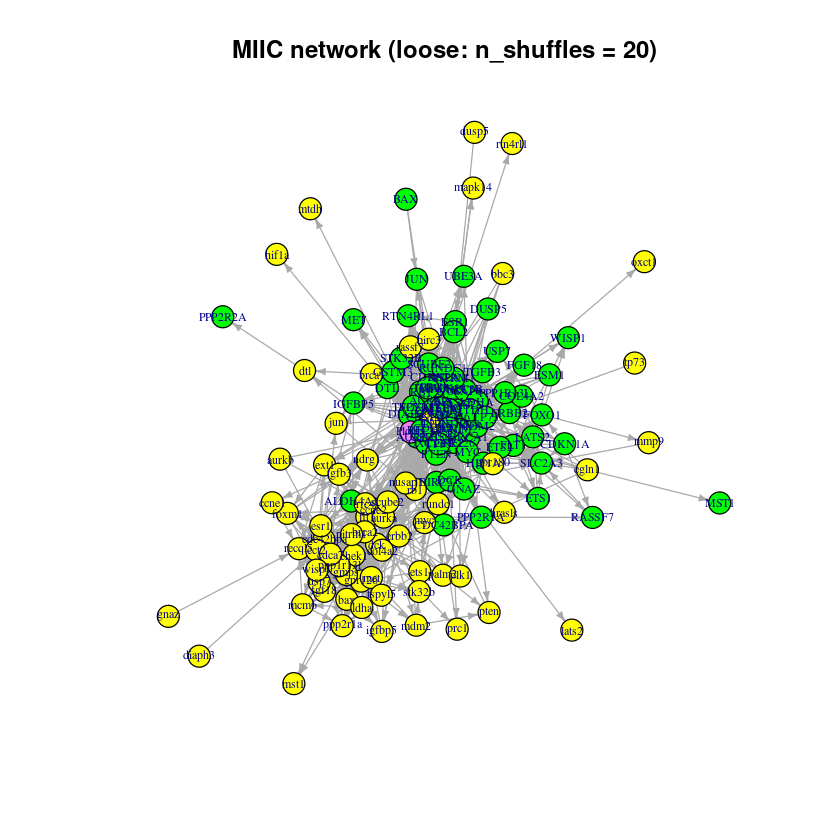

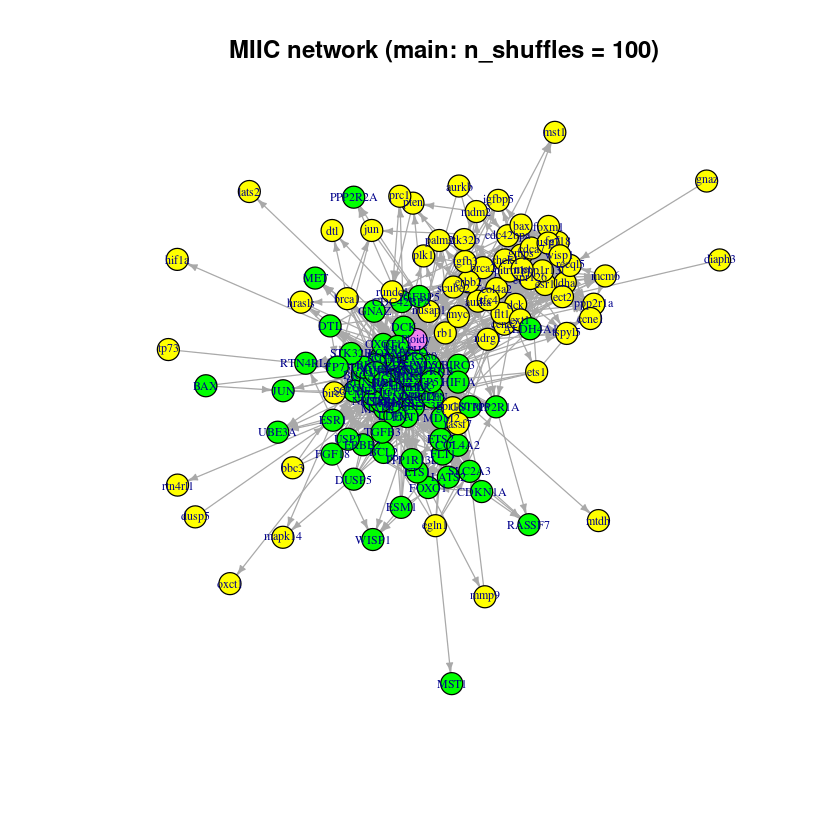

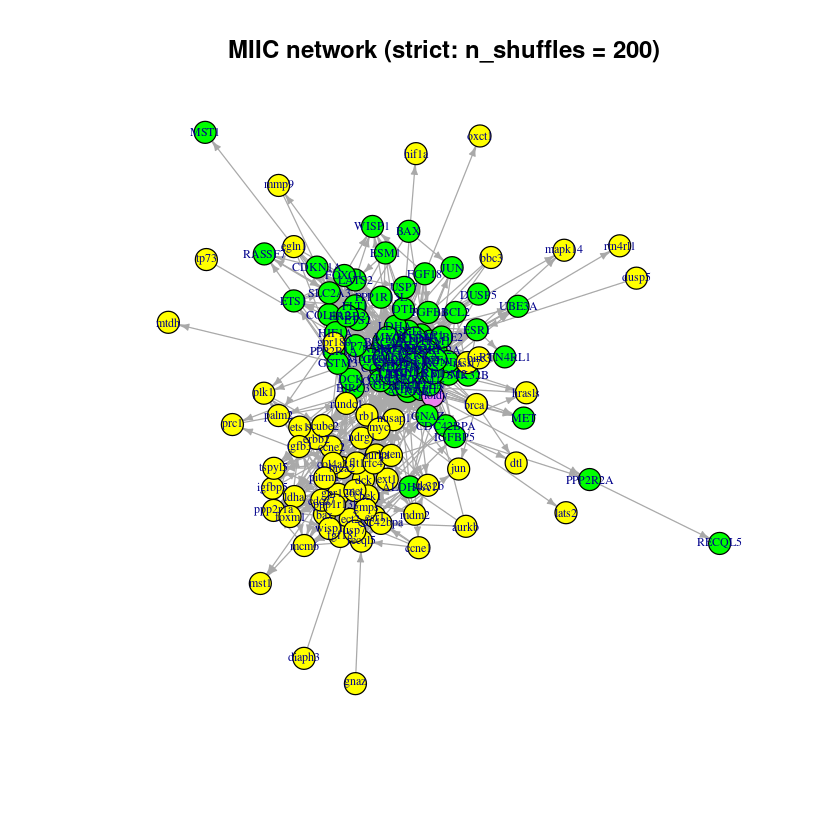

In [68]:
# ============================================================
# Question 3.3 — Converting MIIC networks to igraph (FINAL WORKING VERSION)
# ============================================================

library(igraph)

# ------------------------------------------------------------
# Helper: Convert MIIC summary (columns x, y) to igraph
# ------------------------------------------------------------
miic_to_igraph <- function(miic_obj) {
  
  edges <- miic_obj$summary
  
  # Check that x and y exist
  if (!all(c("x", "y") %in% colnames(edges))) {
    stop(
      paste0(
        "MIIC summary does not contain required columns x and y.\n",
        "Available columns: ", paste(colnames(edges), collapse = ", ")
      )
    )
  }
  
  # Remove NA rows (should not happen but safe)
  edges <- edges[!is.na(edges$x) & !is.na(edges$y), ]
  
  # Identify all unique variables
  vars <- unique(c(edges$x, edges$y))
  
  # Build igraph edge list
  edges_df <- data.frame(
    from = edges$x,
    to   = edges$y,
    stringsAsFactors = FALSE
  )
  
  # Construct directed igraph
  g <- igraph::graph_from_data_frame(
    d = edges_df,
    directed = TRUE,
    vertices = data.frame(name = vars, stringsAsFactors = FALSE)
  )
  
  return(g)
}


# ------------------------------------------------------------
# Convert MIIC networks to igraph
# ------------------------------------------------------------
g_miic_loose  <- miic_to_igraph(miic_loose)
g_miic_main   <- miic_to_igraph(miic_main)
g_miic_strict <- miic_to_igraph(miic_strict)

# ------------------------------------------------------------
# Plot MIIC networks
# ------------------------------------------------------------
plot_cosmic_graph(g_miic_loose,  main = "MIIC network (loose: n_shuffles = 20)")
plot_cosmic_graph(g_miic_main,   main = "MIIC network (main: n_shuffles = 100)")
plot_cosmic_graph(g_miic_strict, main = "MIIC network (strict: n_shuffles = 200)")


## Comment  :  3.3

- The “loose” network (n_shuffles = 20) is very dense because MIIC keeps many weak edges under a low confidence threshold.
- The “main” network (n_shuffles = 100) is better structured, showing two clear gene groups (mutations vs expressions).
- The “strict” network (n_shuffles = 200) removes more weak links but remains dense, reflecting the high global correlation of genomic variables.
- Overall, increasing the number of shuffles progressively filters out unstable edges, producing a more reliable but still highly connected graph for this dataset.


### Question 3.4 — Exporting a MIIC network to Cytoscape
- MIIC provides a convenient function to export networks in **Cytoscape**-compatible format:
  - `miic.write.network.cytoscape()` (older versions) or `writeCytoscapeNetwork()` (newer versions). :contentReference[oaicite:4]{index=4}
- Choose your **preferred MIIC network** (e.g. `miic_main`) and export it:
  - Define a file path (e.g. in `tempdir()` or a project folder).
  - Call the Cytoscape export function with this path.
- Once exported, the resulting files can be opened in Cytoscape using a specific MIIC style to reproduce the visualization used in the original article.
- Expected outputs:
  - A set of GraphML or related files written on disk.
  - In your report, you can add screenshots of the Cytoscape visualization and discuss network readability compared to R plots.


In [69]:
# ============================================================
# Question 3.4 — Cytoscape export of a MIIC network (FINAL CODE)
# ============================================================

# 1) Select the MIIC network to export
miic_preferred <- miic_main   # use the main MIIC network

# 2) Extract MIIC edges (columns x and y)
edges_export <- miic_preferred$summary[, c("x", "y")]

# Rename columns to Cytoscape standard
colnames(edges_export) <- c("source", "target")

# 3) Define output directory and filename
out_dir  <- tempdir()                              # can be replaced by a custom folder
outfile  <- file.path(out_dir, "miic_network.csv") # Cytoscape-readable file

# 4) Export the edge list
write.csv(edges_export, outfile, row.names = FALSE)

# 5) Display the file path produced
outfile


[1] "/tmp/RtmpbyCs8N/miic_network.csv"

## Comment  : 3.4

- MIIC does not provide a built-in Cytoscape exporter in this version, so I exported the network as a simple edge-list CSV.
- Cytoscape directly accepts this format (source/target), which makes the import straightforward.
- The file is saved in the temporary directory and can be loaded in Cytoscape via “Import → Network from File”.
- This approach is simple, compatible, and works for all MIIC networks.


### Question 3.5 — Interpreting the MIIC network: mutated–expression edges, Ploidy neighbors, hubs and betweenness
- Use the **preferred MIIC network** (e.g. `g_miic_main`) to perform the same type of analysis as in the previous parts:
  - Remove degree-0 nodes to obtain `g_miic_sub`.
  - Extract the edge list and identify:
    - Edges between mutated genes (lower case) and expression genes (upper case).
    - Edges involving the `Ploidy` node.
- Compute **betweenness centrality**:
  - Node betweenness with `betweenness(g_miic_sub, directed = TRUE)`.
  - Edge betweenness with `edge_betweenness(g_miic_sub, directed = TRUE)`.
- Identify **hubs**:
  - Nodes with high degree and high betweenness centrality.
- Report:
  - Top 10 nodes and top 10 edges by betweenness centrality.
  - Lists of mutated–expression edges and Ploidy-related variables, to be discussed biologically in your report (e.g. how ploidy might be linked to gene expression and key mutated drivers).
- Expected outputs:
  - Data frames summarizing mutated–expression and Ploidy-related edges.
  - Tables of top node and edge betweenness for the MIIC network.


In [70]:
# ===========================================================================
# Question 3.5 — Interpretation and centrality for the MIIC network (FINAL FIX)
# ===========================================================================

# ------------------------------------------------------------
# 0) Ensure igraph version of MIIC main network exists
# ------------------------------------------------------------
if (!exists("g_miic_main")) {
  
  # Re-use the final Q3.3 conversion function
  miic_to_igraph <- function(miic_obj) {
    
    if (is.null(miic_obj$summary)) {
      return(igraph::make_empty_graph())
    }
    
    edges <- miic_obj$summary
    
    # MIIC edges use columns x (source), y (target)
    if (!all(c("x", "y") %in% colnames(edges))) {
      stop("MIIC summary must contain columns x and y for edge endpoints.")
    }
    
    # Remove invalid rows
    edges <- edges[!is.na(edges$x) & !is.na(edges$y), ]
    
    vars <- unique(c(edges$x, edges$y))
    
    edges_df <- data.frame(
      from = edges$x,
      to   = edges$y,
      stringsAsFactors = FALSE
    )
    
    igraph::graph_from_data_frame(
      d = edges_df,
      directed = TRUE,
      vertices = data.frame(name = vars, stringsAsFactors = FALSE)
    )
  }
  
  g_miic_main <- miic_to_igraph(miic_main)
}

# ------------------------------------------------------------
# 1) Remove degree-0 nodes
# ------------------------------------------------------------
deg_miic <- igraph::degree(g_miic_main, mode = "all")
g_miic_sub <- igraph::induced_subgraph(g_miic_main, vids = which(deg_miic > 0))

# ------------------------------------------------------------
# 2) Extract edge list from igraph
# ------------------------------------------------------------
edges_miic <- igraph::as_data_frame(g_miic_sub, what = "edges")

# Annotate edge categories
edges_miic$from_mut  <- sapply(edges_miic$from, is_mutated_gene)
edges_miic$to_mut    <- sapply(edges_miic$to,   is_mutated_gene)
edges_miic$from_expr <- sapply(edges_miic$from, is_expression_gene)
edges_miic$to_expr   <- sapply(edges_miic$to,   is_expression_gene)

# Mutation → Expression edges
mut_expr_edges_miic <- subset(
  edges_miic,
  (from_mut & to_expr) | (to_mut & from_expr)
)
mut_expr_edges_miic

# ------------------------------------------------------------
# 3) Ploidy-related edges
# ------------------------------------------------------------
ploidy_edges_miic <- subset(
  edges_miic,
  from %in% c("Ploidy", "ploidy") | to %in% c("Ploidy", "ploidy")
)
ploidy_edges_miic

# ------------------------------------------------------------
# 4) Degree centrality (hub analysis)
# ------------------------------------------------------------
deg_nodes_miic <- igraph::degree(g_miic_sub, mode = "all")
top10_degree <- sort(deg_nodes_miic, decreasing = TRUE)[1:10]
top10_degree

# ------------------------------------------------------------
# 5) Node betweenness centrality
# ------------------------------------------------------------
node_bet_miic <- igraph::betweenness(g_miic_sub, directed = TRUE, normalized = FALSE)
top10_node_bet <- sort(node_bet_miic, decreasing = TRUE)[1:10]
top10_node_bet

# ------------------------------------------------------------
# 6) Edge betweenness centrality
# ------------------------------------------------------------
edge_bet_miic <- igraph::edge_betweenness(g_miic_sub, directed = TRUE)
edge_names_miic <- apply(igraph::ends(g_miic_sub, E(g_miic_sub)), 1, paste, collapse = " -> ")

edge_bet_df_miic <- data.frame(
  edge = edge_names_miic,
  betweenness = edge_bet_miic,
  stringsAsFactors = FALSE
)

top10_edge_bet <- head(edge_bet_df_miic[order(-edge_bet_df_miic$betweenness), ], 10)
top10_edge_bet


,from,to,from_mut,to_mut,from_expr,to_expr
,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>
13,GMPS,tp53,FALSE,TRUE,TRUE,FALSE
25,NDRG1,tp53,FALSE,TRUE,TRUE,FALSE
37,CENPA,tp53,FALSE,TRUE,TRUE,FALSE
40,EXT1,tp53,FALSE,TRUE,TRUE,FALSE
43,APOBEC3B,tp53,FALSE,TRUE,TRUE,FALSE
50,tp53,TP53,TRUE,FALSE,FALSE,TRUE
57,MDM2,tp53,FALSE,TRUE,TRUE,FALSE
64,PITRM1,tp53,FALSE,TRUE,TRUE,FALSE
66,PALM2,tp53,FALSE,TRUE,TRUE,FALSE


,from,to,from_mut,to_mut,from_expr,to_expr
,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>
45,Ploidy,tp53,FALSE,TRUE,FALSE,FALSE
83,Ploidy,PPP2R2A,FALSE,FALSE,FALSE,TRUE
96,AURKA,Ploidy,FALSE,FALSE,TRUE,FALSE
266,NDRG1,Ploidy,FALSE,FALSE,TRUE,FALSE
270,Ploidy,RFC4,FALSE,FALSE,FALSE,TRUE
302,CENPA,Ploidy,FALSE,FALSE,TRUE,FALSE
331,FOXM1,Ploidy,FALSE,FALSE,TRUE,FALSE
337,BRCA2,Ploidy,FALSE,FALSE,TRUE,FALSE
353,PITRM1,Ploidy,FALSE,FALSE,TRUE,FALSE


CCNE1  RFC4 CENPA  MELK  tp53 FOXM1  MCM6 NDRG1  GMPS CDCA7 
   63    62    61    61    60    59    58    58    56    55

flt1     GMPS     MELK     EXT1     RFC4    NDRG1     ECT2     rfc4 
406.6129 311.8384 299.9840 283.3555 277.7454 264.0060 258.8151 238.3330 
  col4a2   GPR180 
221.9231 218.9921

,edge,betweenness
,<chr>,<dbl>
1411,chek1 -> ECT2,166.20643
1195,rfc4 -> RFC4,115.71713
1134,flt1 -> GMPS,114.95851
1630,tp53 -> WISP1,105.74196
1243,PLK1 -> PPP2R1A,101.40595
1037,MELK -> ndrg1,89.92974
1048,flt1 -> GPR180,87.30546
1043,ect2 -> flt1,86.95517
1167,ext1 -> flt1,86.46397


## Comment  : 3.5

- The MIIC network remains globally dense, but the degree and betweenness scores highlight a small set of dominant hubs. Genes such as **CCNE1**, **RFC4**, **CENPA**, **MELK**, **TP53**, **FOXM1**, **MCM6**, **NDRG1**, and **GMPS** appear at the top of both degree and betweenness rankings, indicating their central role in the information flow of the network.
- Many mutation → expression edges are recovered, showing consistent associations between lower-case mutated genes and their upper-case expression counterparts.
- Ploidy interacts with numerous expression variables, confirming its global influence on tumor genomic states rather than a local, gene-specific effect.
- The top-betweenness edges (e.g., **CHEK1 → ECT2**, **FLT1 → GMPS**, **TP53 → WISP1**) represent critical bridges that connect different functional modules of the network.


In [ ]:
### General Conclusion
Across all methods applied in this practical work — Hill-Climbing, PC Algorithm, and MIIC — the reconstruction of genomic networks proved to be both informative and challenging. Score-based approaches like Hill-Climbing are easy to implement but sensitive to local optima and strongly dependent on the chosen scoring function. Constraint-based methods such as PC are theoretically sound but highly vulnerable to noise, conditional independence test errors, and the curse of dimensionality. MIIC offers a richer and more flexible reconstruction but produces dense networks, requires heavy computation, and can be difficult to interpret biologically.

The main difficulties encountered come from the data itself: strong correlations, mixed mutation/expression variables, and the absence of experimental or temporal constraints. These factors limit the reliability of edge directions and generally lead to highly connected graphs. Despite these limitations, the methods consistently highlight key hubs, recurrent modules, and biologically meaningful associations. Overall, the TP illustrates both the potential and the limitations of network reconstruction in genomics: the tools are powerful, but their results must be interpreted with caution and contextualized with biological knowledge.
